# # Assignment Submission:

* Q1. Write a program which accepts a sequence of comma separated 4 digit binary numbers as its input and then check whether they are divisible by 5 or not. The numbers that are divisible by 5 are to be printed in a comma separated sequence. Example: 0100,0011,1010,1001. Then the output should be: 1010

In [221]:
def divby5(data):
    lst = []                                   
    for t in range(len(data)):
        if len(data[t]) == 4:
            try:
                x = int(data[t],2)
                if x % 5 == 0:
                    lst.append(data[t])
            except:
                print('Provided 4 digit number ' + str(data[t]) + ' is not Binary')
    return lst

sequence = input('Please enter 4 digit binary comma seprated sequence..')
l = sequence.strip().split(',')

divby5(l)


Please enter 4 digit binary comma seprated sequence..0100,0011,1010,1001


['1010']

* Q2. A website requires the users to input username and password to register. Write a program to check the validity of password input by users.
Following are the criteria for checking the password:
1. At least 1 letter between [a-z]
2. At least 1 number between [0-9]
1. At least 1 letter between [A-Z]
3. At least 1 character from [$#@]
4. Minimum length of transaction password: 6
5. Maximum length of transaction password: 12
Your program should accept a sequence of comma separated passwords and will check them according to the above criteria. Passwords that match the criteria are to be printed, each separated by a comma

In [28]:
import re

def valid_password(data):
    valid_password = []
    for i in range(len(data)):
        if (len(data[i]) > 5) and (len(data[i]) < 13):
            p = re.findall("^.*(?=.{6,12})(?=.*\d)(?=.*[a-z])(?=.*[A-Z])(?=.*[@#$]).*$",data[i])
            print(p)
            if len(p) > 0:
                valid_password.append(p)
    return valid_password
                
                                    
password = input('Please Enter Password: ')
password_list = password.strip().split(',')

valid_password(password_list)         

Please Enter Password: Manu@123safjfjdsaofdsa


[]

*Q3.You are required to write a program to sort the (name, age, height) tuples by ascending order where name is string, age and height are numbers. The tuples are input by console. The sort criteria is:
1. Sort based on name;
2. Then sort based on age;
3. Then sort by score.

The priority is that name > age > score.

If the following tuples are given as input to the program:

Tom,19,80
John,20,90
Jony,17,91
Jony,17,93
Json,21,85

records = input('Enter Number of Records: ')
values = []
try:
    for i in range(int(records)):
        list_in = [x for x in input('Enter Name, Age, Height: ').split(',')]
        list_in[1] = int(list_in[1])
        list_in[2] = int(list_in[2])
        values.append(tuple(list_in))
except ValueError:
    print('Error Occured')
    
    
def sortfn(data):
    try:
        data.sort(key = lambda x: [x[0],x[1],x[2]])
        print('Sorted tuple: {}'.format(data))
    except ValueError:
        print('Error Occured')
    
sortfn(values) 

Q4. Using “Test_Data.csv”, please do the following:

* 4.1. Extract columns ‘A’,‘B’,’C’,’G’,’R’,’X6’ and ’X8’ for different classes using dictionary and save as a csv for each class.

In [164]:
'''Imorting Required packages'''

import csv
import missingno
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




In [2]:

reader = csv.DictReader(open('Test_Data.csv', 'r'))
read_dict = list(reader)

dictionary = {}
for i in  range(len(read_dict)):
    for key,value in read_dict[i].items():
        dictionary.setdefault(key, []).append(value)

col_ext = ['A', 'B', 'C', 'G', 'R', 'X6', 'X8', 'Class']

new_dict = {}           
extract_columns = lambda x, y: dict([(i,x[i]) for i in x if i in set(y)])

new_dict = extract_columns(dictionary, col_ext)
      
df = pd.DataFrame(new_dict) 

print(df.info())

print('Shape of Dataframe: {}'.format(df.shape))

class_name = df.Class.unique()
print('Unique classes present in varaible Class: {}'.format(class_name))

file = ['A.csv', 'B.csv', 'C.csv', 'D.csv', 'E.csv', 'F.csv']

for i in range(len(class_name)):
    d = df[df.Class == class_name[i]]
    d.to_csv(file[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 8 columns):
A        5839 non-null object
B        5839 non-null object
C        5839 non-null object
G        5839 non-null object
R        5839 non-null object
X6       5839 non-null object
X8       5839 non-null object
Class    5839 non-null object
dtypes: object(8)
memory usage: 365.0+ KB
None
Shape of Dataframe: (5839, 8)
Unique classes present in varaible Class: ['A' 'B' 'C' 'D' 'E' 'F']


# 4.2 Do a complete EDA on each class file.

In [3]:
data = []
import glob
file = glob.glob('[A-Z].csv')
for i in range(len(class_name)):
    x = pd.read_csv(file[i], index_col = 0)
    data.append(x)
    
A = data[0]
A = A.drop('Class', axis = 1)

B = data[1]
B = B.drop('Class', axis = 1)

C = data[2]
C = C.drop('Class', axis = 1)

D = data[3]
D = D.drop('Class', axis = 1)

E = data[4]
E = E.drop('Class', axis = 1)

F = data[5]
F = F.drop('Class', axis = 1)

In [4]:
A.info()

print('Shape of A: {}'.format(A.shape))

A.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 5838
Data columns (total 7 columns):
A     1052 non-null int64
B     1052 non-null float64
C     1052 non-null float64
G     1052 non-null float64
R     1052 non-null int64
X6    1052 non-null float64
X8    1052 non-null float64
dtypes: float64(5), int64(2)
memory usage: 65.8 KB
Shape of A: (1052, 7)


A            B            C            G             R  \
count  1052.000000  1052.000000  1052.000000  1052.000000   1052.000000   
mean      8.576046   893.219534   750.871245    60.383498   3410.617871   
std       2.504595   174.609851   189.572779    13.400865   6081.740883   
min       4.000000   470.990000   309.900000    38.230000     14.000000   
25%       7.000000   760.020000   609.800000    50.440000    847.500000   
50%       8.000000   887.520000   749.750000    56.090000   1679.500000   
75%       9.000000  1050.120000   909.700000    66.690000   3430.750000   
max      21.000000  1193.520000  1139.620000   120.040000  59046.000000   

                X6           X8  
count  1052.000000  1052.000000  
mean     62.932346     0.237432  
std      22.531979     0.060484  
min       4.166700     0.094400  
25%      45.211650     0.180600  
50%      66.284900     0.246000  
75%      82.593800     0.284650  
max     100.000000     0.362200

In [5]:
B.info()

print('Shape of B: {}'.format(B.shape))

B.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163 entries, 118 to 5727
Data columns (total 7 columns):
A     1163 non-null int64
B     1163 non-null float64
C     1163 non-null float64
G     1163 non-null float64
R     1163 non-null int64
X6    1163 non-null float64
X8    1163 non-null float64
dtypes: float64(5), int64(2)
memory usage: 72.7 KB
Shape of B: (1163, 7)


A            B            C            G             R  \
count  1163.000000  1163.000000  1163.000000  1163.000000   1163.000000   
mean      8.208942   813.830284   693.646578    67.423637   2770.271711   
std       1.678103   188.226739   175.846559    19.819169   5970.600322   
min       4.000000   372.080000   309.900000    37.510000      5.000000   
25%       7.000000   653.680000   569.810000    53.120000    575.500000   
50%       8.000000   832.660000   699.770000    63.180000   1097.000000   
75%       9.000000   966.230000   829.720000    74.100000   2424.000000   
max      19.000000  1163.360000  1109.630000   142.900000  78603.000000   

                X6           X8  
count  1163.000000  1163.000000  
mean     56.159403     0.217026  
std      22.294839     0.063019  
min       5.853700     0.101800  
25%      38.913050     0.173500  
50%      57.542600     0.210700  
75%      74.219000     0.278850  
max      98.755400     0.361100

In [6]:
C.info()

print('Shape of C: {}'.format(C.shape))

C.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 534 to 5348
Data columns (total 7 columns):
A     1694 non-null int64
B     1694 non-null float64
C     1694 non-null float64
G     1694 non-null float64
R     1694 non-null int64
X6    1694 non-null float64
X8    1694 non-null float64
dtypes: float64(5), int64(2)
memory usage: 105.9 KB
Shape of C: (1694, 7)


A            B            C            G             R  \
count  1694.000000  1694.000000  1694.000000  1694.000000   1694.000000   
mean      7.748524   927.232509   803.964469    58.968524   3290.348878   
std       2.061212   181.975550   173.545224    12.811666   6343.879438   
min       4.000000   480.840000   309.900000    37.510000     18.000000   
25%       7.000000   794.310000   709.760000    47.260000    657.500000   
50%       8.000000   911.825000   809.730000    57.710000   1400.000000   
75%       8.000000  1103.930000   939.690000    67.440000   3648.750000   
max      27.000000  1267.760000  1139.620000   117.690000  99096.000000   

                X6           X8  
count  1694.000000  1694.000000  
mean     69.925165     0.231050  
std      19.565174     0.047376  
min       8.000000     0.103100  
25%      56.959300     0.210425  
50%      74.084500     0.220700  
75%      85.799675     0.255550  
max      99.263800     0.358600

In [7]:
D.info()

print('Shape of D: {}'.format(D.shape))

D.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1481 to 4863
Data columns (total 7 columns):
A     202 non-null int64
B     202 non-null float64
C     202 non-null float64
G     202 non-null float64
R     202 non-null int64
X6    202 non-null float64
X8    202 non-null float64
dtypes: float64(5), int64(2)
memory usage: 12.6 KB
Shape of D: (202, 7)


A            B            C           G             R  \
count  202.000000   202.000000   202.000000  202.000000    202.000000   
mean    16.143564   805.085693   680.367624   68.814851   2641.188119   
std      8.398897   202.255136   184.837640   18.718445   4422.918804   
min      5.000000   599.380000   359.880000   38.970000     26.000000   
25%      8.000000   635.342500   589.800000   51.300000    129.250000   
50%     16.500000   686.435000   619.790000   64.545000    687.000000   
75%     25.000000   951.835000   787.240000   88.260000   3571.750000   
max     28.000000  1259.580000  1119.630000   95.270000  31678.000000   

               X6          X8  
count  202.000000  202.000000  
mean    51.769753    0.208135  
std     21.803495    0.065011  
min      8.366500    0.135400  
25%     33.195700    0.142200  
50%     50.730800    0.181250  
75%     69.623000    0.251775  
max     95.240900    0.359100

In [8]:
E.info()

print('Shape of E: {}'.format(E.shape))

E.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 1583 to 5006
Data columns (total 7 columns):
A     1029 non-null int64
B     1029 non-null float64
C     1029 non-null float64
G     1029 non-null float64
R     1029 non-null int64
X6    1029 non-null float64
X8    1029 non-null float64
dtypes: float64(5), int64(2)
memory usage: 64.3 KB
Shape of E: (1029, 7)


A            B            C            G             R  \
count  1029.000000  1029.000000  1029.000000  1029.000000   1029.000000   
mean     12.443149   848.512177   726.006589    64.434820   2776.046647   
std       6.617828   209.793019   204.820583    16.230826   5738.553575   
min       4.000000   498.820000   309.900000    38.230000      9.000000   
25%       7.000000   661.820000   589.800000    51.740000    351.000000   
50%       9.000000   796.680000   659.780000    57.710000    951.000000   
75%      18.000000  1040.760000   919.690000    81.110000   3132.000000   
max      29.000000  1304.800000  1169.610000   113.250000  66261.000000   

                X6           X8  
count  1029.000000  1029.000000  
mean     55.052573     0.216995  
std      22.269585     0.065712  
min       5.946300     0.113500  
25%      37.211700     0.172600  
50%      56.637200     0.210800  
75%      72.848700     0.255300  
max      98.217900     0.361700

In [9]:
F.info()

print('Shape of F: {}'.format(F.shape))

F.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 2048 to 4359
Data columns (total 7 columns):
A     699 non-null int64
B     699 non-null float64
C     699 non-null float64
G     699 non-null float64
R     699 non-null int64
X6    699 non-null float64
X8    699 non-null float64
dtypes: float64(5), int64(2)
memory usage: 43.7 KB
Shape of F: (699, 7)


A            B            C           G             R  \
count  699.000000   699.000000   699.000000  699.000000    699.000000   
mean     9.726753   935.594592   784.030300   57.370200   3927.686695   
std      4.363631   183.032058   182.913254   13.420606   3934.845772   
min      5.000000   508.250000   319.890000   38.230000      4.000000   
25%      7.000000   841.925000   679.770000   47.825000   2170.000000   
50%      8.000000   906.150000   769.740000   56.090000   3424.000000   
75%     10.000000  1127.380000   959.680000   60.630000   4808.000000   
max     28.000000  1271.000000  1139.620000  115.420000  71015.000000   

               X6          X8  
count  699.000000  699.000000  
mean    66.951735    0.228322  
std     21.679599    0.053639  
min      9.166700    0.136300  
25%     51.185650    0.180750  
50%     71.032000    0.242000  
75%     85.157900    0.258700  
max     99.179600    0.360600

# Exploratory Data Analysis for Class A ('A.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 5838
Data columns (total 7 columns):
A     1052 non-null int64
B     1052 non-null float64
C     1052 non-null float64
G     1052 non-null float64
R     1052 non-null int64
X6    1052 non-null float64
X8    1052 non-null float64
dtypes: float64(5), int64(2)
memory usage: 65.8 KB
info 
 None
                 A            B            C            G             R  \
count  1052.000000  1052.000000  1052.000000  1052.000000   1052.000000   
mean      8.576046   893.219534   750.871245    60.383498   3410.617871   
std       2.504595   174.609851   189.572779    13.400865   6081.740883   
min       4.000000   470.990000   309.900000    38.230000     14.000000   
25%       7.000000   760.020000   609.800000    50.440000    847.500000   
50%       8.000000   887.520000   749.750000    56.090000   1679.500000   
75%       9.000000  1050.120000   909.700000    66.690000   3430.750000   
max      21.000000  1193.520000  1139.6

<Figure size 720x360 with 0 Axes>

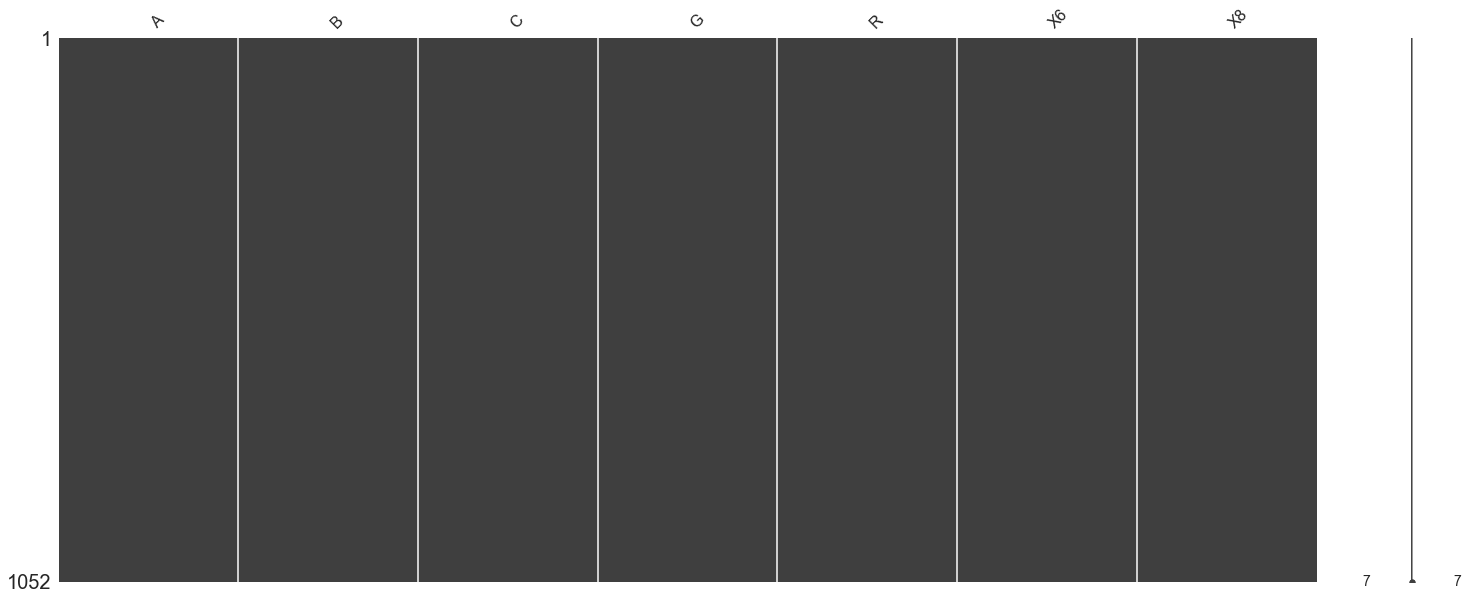

Skewness & Kurtosis distribution : 



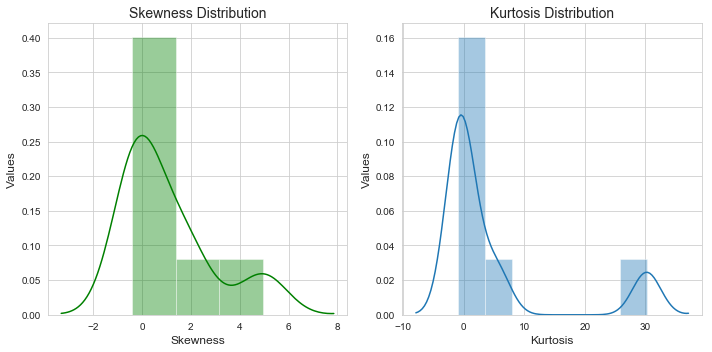


 Values Counts of Variable A: 
 8     279
7     235
9     184
6     103
10     97
11     32
12     25
5      25
13     15
15     12
18     10
17      9
19      8
14      7
16      6
21      2
4       2
20      1
Name: A, dtype: int64 
 Skewness of A: 
 A     2.055279
B    -0.177990
C    -0.146795
G     1.260483
R     4.944606
X6   -0.407180
X8   -0.066154
dtype: float64 
 Kurtosis of A: 
 A      5.496018
B     -1.023409
C     -0.642811
G      1.411843
R     30.195232
X6    -0.852231
X8    -0.889990
dtype: float64 
 Variance in features of A 
 A     6.272994e+00
B     3.048860e+04
C     3.593784e+04
G     1.795832e+02
R     3.698757e+07
X6    5.076901e+02
X8    3.658281e-03
dtype: float64


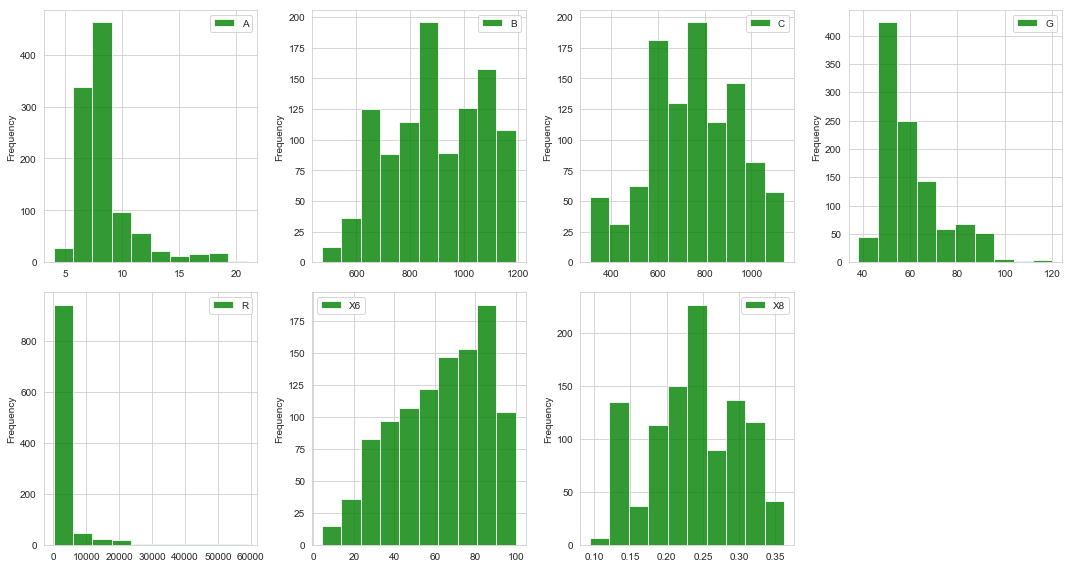

In [36]:
print('info \n',A.info())

print(A.describe())

print('\n First 5 rows of A \n \n',A.head())

print('\n \n Number of missing values: {} '.format(A.isnull().sum()))

print('\n Missing Values in each columns \n')
plt.figure(figsize = (10,5))
missingno.matrix(A.isnull())
plt.show()

val_count = A.A.value_counts()

a_skewness = A.skew()

a_kurtosis = A.kurt()

variance = A.var()

print('Skewness & Kurtosis distribution : \n')
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(a_skewness, color = 'g', kde = True)
plt.title('Skewness Distribution', fontsize = 14)
plt.xlabel('Skewness', fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.subplot(1,2,2)
sns.distplot(a_kurtosis)
plt.title('Kurtosis Distribution', fontsize = 14)
plt.xlabel('Kurtosis',fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()

print('\n Values Counts of Variable A: \n {}'.format(val_count), '\n Skewness of A: \n {}'.format(a_skewness),
'\n Kurtosis of A: \n {}'.format(a_kurtosis), '\n Variance in features of A \n {}'.format(variance))

''' All feaures are non-normally ditributed '''
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))
for i,col in enumerate(A.columns):
    plt.subplot(2, 4,i + 1)
    A[col].plot(kind = 'hist', legend = True, color = 'g', alpha = 0.8)
    plt.tight_layout()
plt.show()


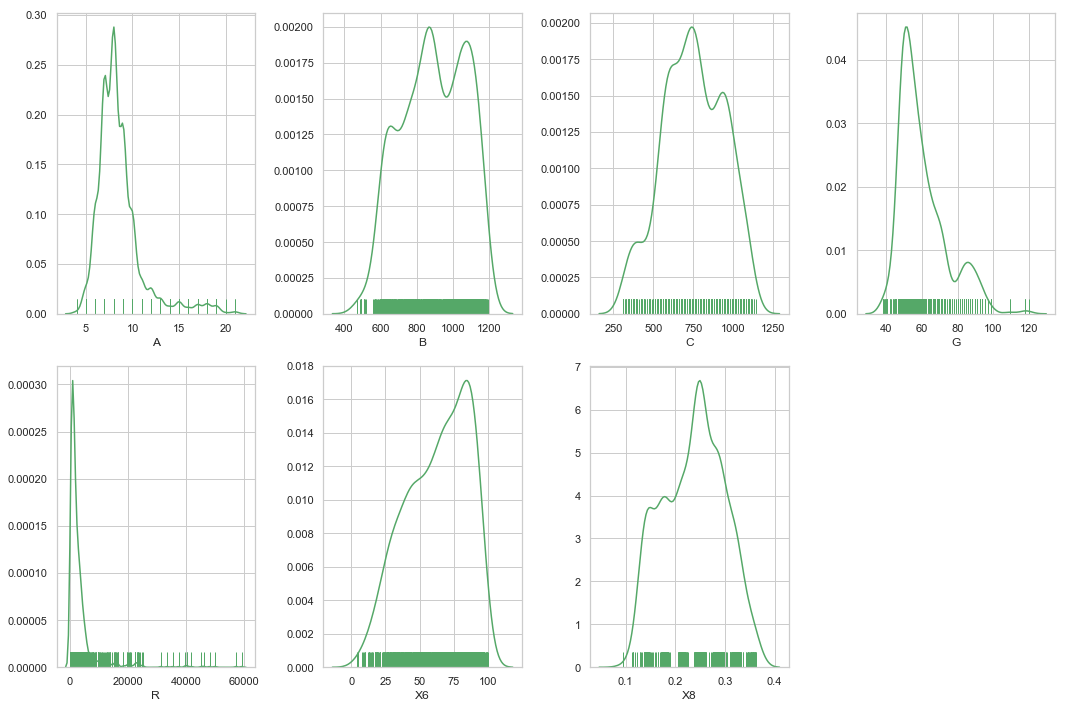

In [75]:
''' All features are non-normal i.e Non parametric in nature '''

sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
for i,col in enumerate(A.columns):
    plt.subplot(2, 4,i + 1)
    sns.distplot(A[col], color = 'g',rug = True, hist = False)
    plt.tight_layout()
plt.show()


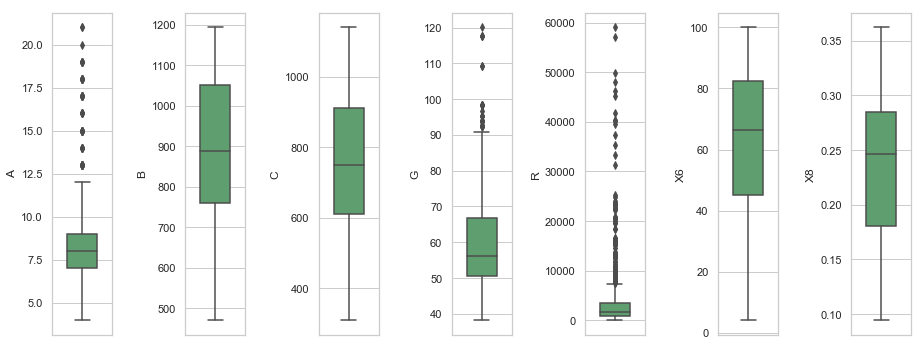

In [74]:
''' A, G, R having outliers '''

sns.set_style('whitegrid')

plt.figure(figsize = (13,5))
for i,col in enumerate(A.columns):
    plt.subplot(1, 7,i + 1)
    sns.boxplot(y = A[col], color = 'g', orient='v', width=0.5)
    plt.tight_layout()
plt.show()

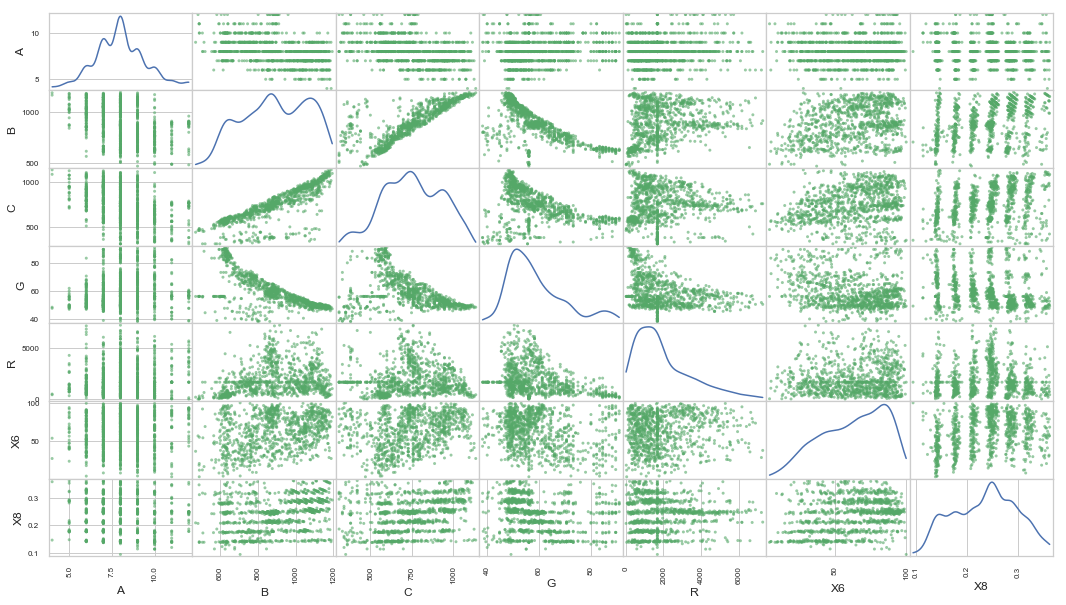

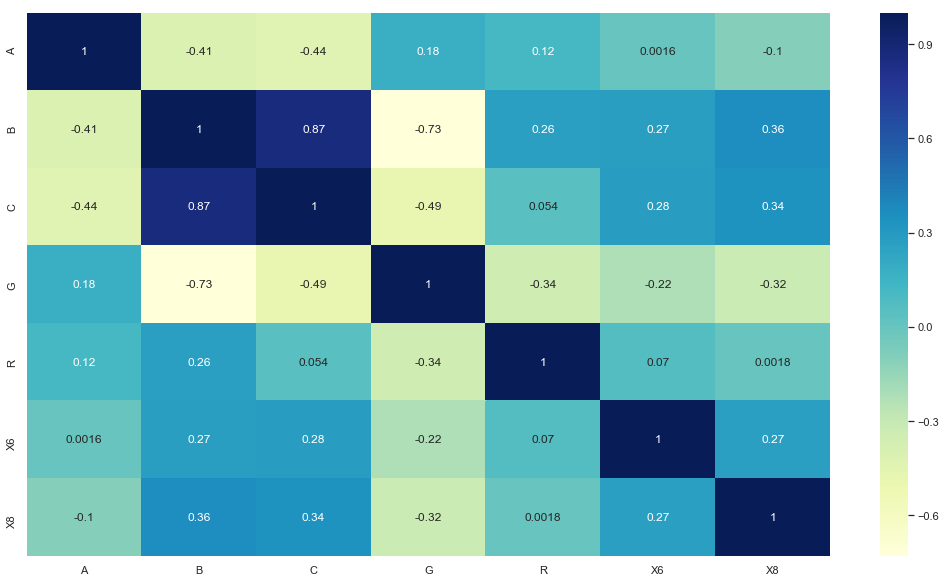

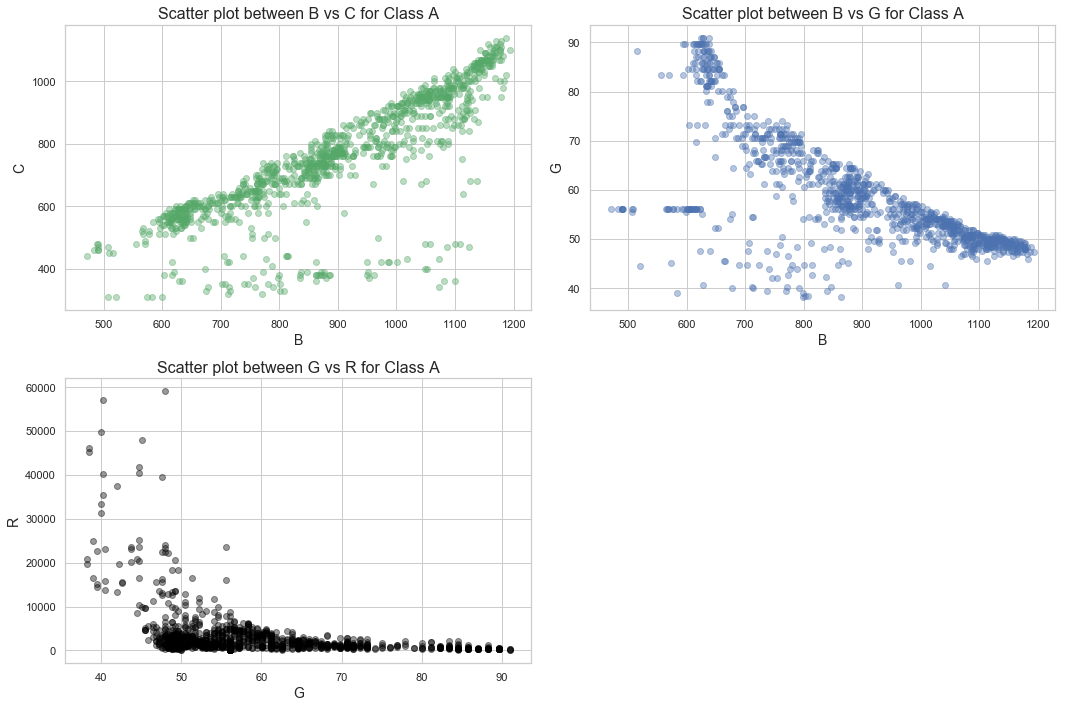

In [148]:
#'''Handling Outliers'''
#des = A.describe() 
#type(des)
#iqr = des.iloc[[4,6],:]

#iqr_range = iqr.iloc[1,:] - iqr.iloc[0,:]
#limit = 1.5*iqr_range
#upper = iqr.iloc[1,:] + limit
#lower = iqr.iloc[0,:] - limit

#l = [0,3,4] 
#''' list of A, G, R columns index '''

#for index, columns in enumerate(l):    
#    x = A.iloc[:, columns]
#    ix = np.where((x > upper[index]) | (x < lower[index]))
#    x.iloc[ix] = x.replace(x.iloc[ix], des.iloc[5, columns])

''' Plotting Scatter Matrix '''

scatter_matrix(A, color = 'g', alpha= 0.6, diagonal = 'kde', figsize=(18, 10))
plt.show()

''' Heatmap of Correlation Matrix '''
'\n'
cor = A.corr(method = 'spearman')
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot = True, cmap = 'YlGnBu')
plt.show()
''' B,C,G,R' showing strong correlation '''

''' scatter plot between variables showing correlation '''

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.scatter(A['B'], A['C'], c = 'g', alpha = 0.4, label = (B,C))
plt.xlabel('B', fontsize=14)
plt.ylabel('C', fontsize=14)
plt.title('Scatter plot between B vs C for Class A',fontsize=16)
plt.subplot(2,2,2)
plt.scatter(A['B'], A['G'], c = 'b', alpha = 0.4)
plt.xlabel('B', fontsize=14)
plt.ylabel('G', fontsize=14)
plt.title('Scatter plot between B vs G for Class A',fontsize=16)
plt.subplot(2,2,3)
plt.scatter(A['G'], A['R'], c = 'black', alpha = 0.4)
plt.xlabel('G', fontsize=14)
plt.ylabel('R', fontsize=14)
plt.title('Scatter plot between G vs R for Class A',fontsize=16)
plt.tight_layout()
plt.show()


# EDA insights For Class A

In [151]:
# Variables A & R have int dtype, remaining features have float dtype.
print('Skewness of A: \n {}'.format(a_skewness))
#Variables A,G,R are positively skewed while remaining varibles are negatively skewed.
print('Kurtosis of A: \n {}'.format(a_kurtosis))
print('Shape of A: \n {}'.format(A.shape))
print('Mean of Variables \n {}'.format(A.mean()))
print('Median of Variables \n {}'.format(A.median()))
print('Standard deviation of Variables \n {}'.format(A.std()))
print('Interquartile range of variables are \n {}'.format(iqr_range))
# No Missing values are present.
# Duplicate values are not present.
# All features are non normally distributed.
# Distribution of All features are non normal.
# Dtype of variable A is int numeric but it can be represented as categorical variable.
print('The unique values in A are: \n {}'.format(A.A.unique()))
# Variable R,G have outliers
# Variable B & C and B & G showing multicollinearity.


Skewness of A: 
 A     0.405174
B    -0.177990
C    -0.146795
G     1.040270
R     1.149862
X6   -0.407180
X8   -0.066154
dtype: float64
Kurtosis of A: 
 A     0.357581
B    -1.023409
C    -0.642811
G     0.481293
R     0.844920
X6   -0.852231
X8   -0.889990
dtype: float64
Shape of A: 
 (1052, 7)
Mean of Variables 
 A        8.047529
B      893.219534
C      750.871245
G       59.029068
R     1942.328897
X6      62.932346
X8       0.237432
dtype: float64
Median of Variables 
 A        8.0000
B      887.5200
C      749.7500
G       56.0900
R     1679.2500
X6      66.2849
X8       0.2460
dtype: float64
Standard deviation of Variables 
 A        1.434131
B      174.609851
C      189.572779
G       11.413798
R     1458.735282
X6      22.531979
X8       0.060484
dtype: float64
Interquartile range of variables are 
 A        2.00000
B      290.10000
C      299.90000
G       14.10000
R     1839.75000
X6      37.38215
X8       0.10405
dtype: float64
The unique values in A are: 
 [ 6  7 10 11  

# Exploratory Data Analysis for Class B ('B.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163 entries, 118 to 5727
Data columns (total 7 columns):
A     1163 non-null int64
B     1163 non-null float64
C     1163 non-null float64
G     1163 non-null float64
R     1163 non-null int64
X6    1163 non-null float64
X8    1163 non-null float64
dtypes: float64(5), int64(2)
memory usage: 72.7 KB
info 
 None
                 A            B            C            G             R  \
count  1163.000000  1163.000000  1163.000000  1163.000000   1163.000000   
mean      8.208942   813.830284   693.646578    67.423637   2770.271711   
std       1.678103   188.226739   175.846559    19.819169   5970.600322   
min       4.000000   372.080000   309.900000    37.510000      5.000000   
25%       7.000000   653.680000   569.810000    53.120000    575.500000   
50%       8.000000   832.660000   699.770000    63.180000   1097.000000   
75%       9.000000   966.230000   829.720000    74.100000   2424.000000   
max      19.000000  1163.360000  1109

<Figure size 720x360 with 0 Axes>

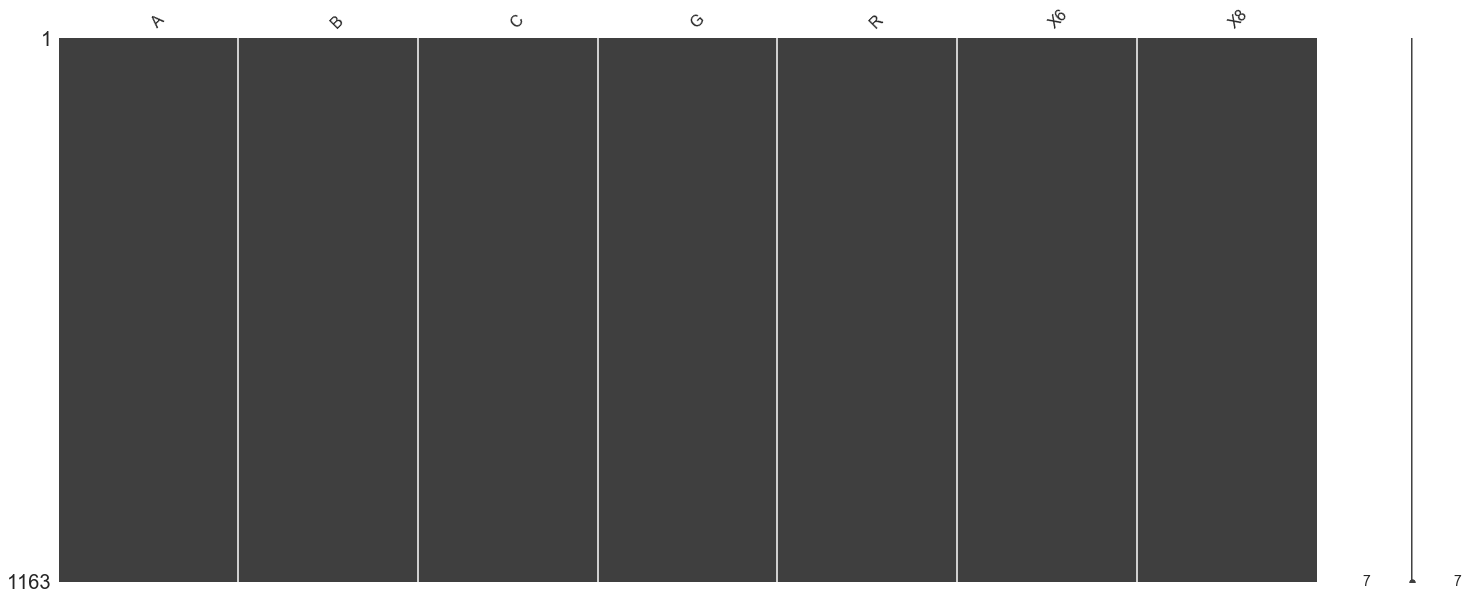

Skewness & Kurtosis distribution : 



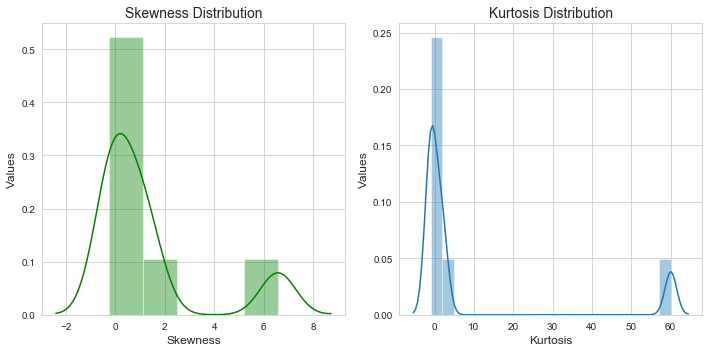

Values Counts of Variable A: 
 7     324
8     308
9     198
6     106
10     89
11     63
12     37
5      16
13     15
14      3
15      2
19      1
4       1
Name: A, dtype: int64 
 
 Skewness of B: 
 A     1.056110
B    -0.265739
C    -0.062732
G     1.376288
R     6.570214
X6   -0.192615
X8    0.434888
dtype: float64 
 
 Kurtosis of B: 
 A      2.094887
B     -0.880205
C     -0.831034
G      1.724614
R     60.060837
X6    -0.889106
X8    -0.970587
dtype: float64 
 
 Variance in features of B 
 A     2.816030e+00
B     3.542931e+04
C     3.092201e+04
G     3.927995e+02
R     3.564807e+07
X6    4.970598e+02
X8    3.971444e-03
dtype: float64


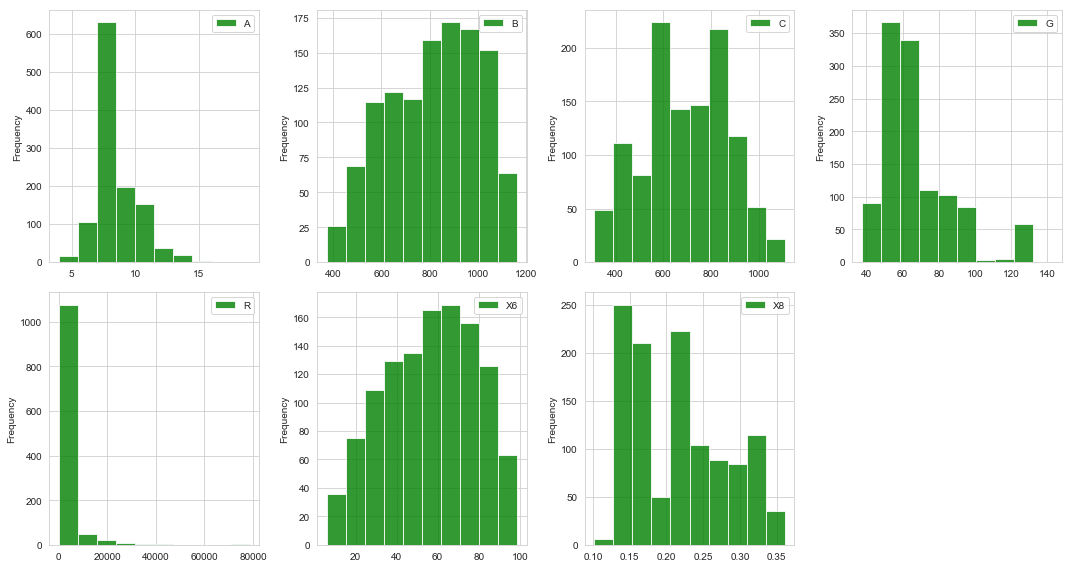

In [35]:
print('info \n',B.info())

print(B.describe())

print('\n First 5 rows of B \n \n',B.head())

print('\n \n Number of missing values: {} '.format(B.isnull().sum()))

print('\n Missing Values in each columns \n')
plt.figure(figsize = (10,5))
missingno.matrix(B.isnull())
plt.show()

val_count = B.A.value_counts()

b_skewness = B.skew()

b_kurtosis = B.kurt()

b_variance = B.var()

print('Skewness & Kurtosis distribution : \n')
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(b_skewness, color = 'g', kde = True)
plt.title('Skewness Distribution', fontsize = 14)
plt.xlabel('Skewness', fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.subplot(1,2,2)
sns.distplot(b_kurtosis)
plt.title('Kurtosis Distribution', fontsize = 14)
plt.xlabel('Kurtosis',fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()


print('Values Counts of Variable A: \n {}'.format(val_count), '\n \n Skewness of B: \n {}'.format(b_skewness),
'\n \n Kurtosis of B: \n {}'.format(b_kurtosis), '\n \n Variance in features of B \n {}'.format(b_variance))

''' All feaures are non-normally ditributed '''
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))
for i,col in enumerate(B.columns):
    plt.subplot(2, 4,i + 1)
    B[col].plot(kind = 'hist', legend = True, color = 'g', alpha = 0.8)
    plt.tight_layout()
plt.show()

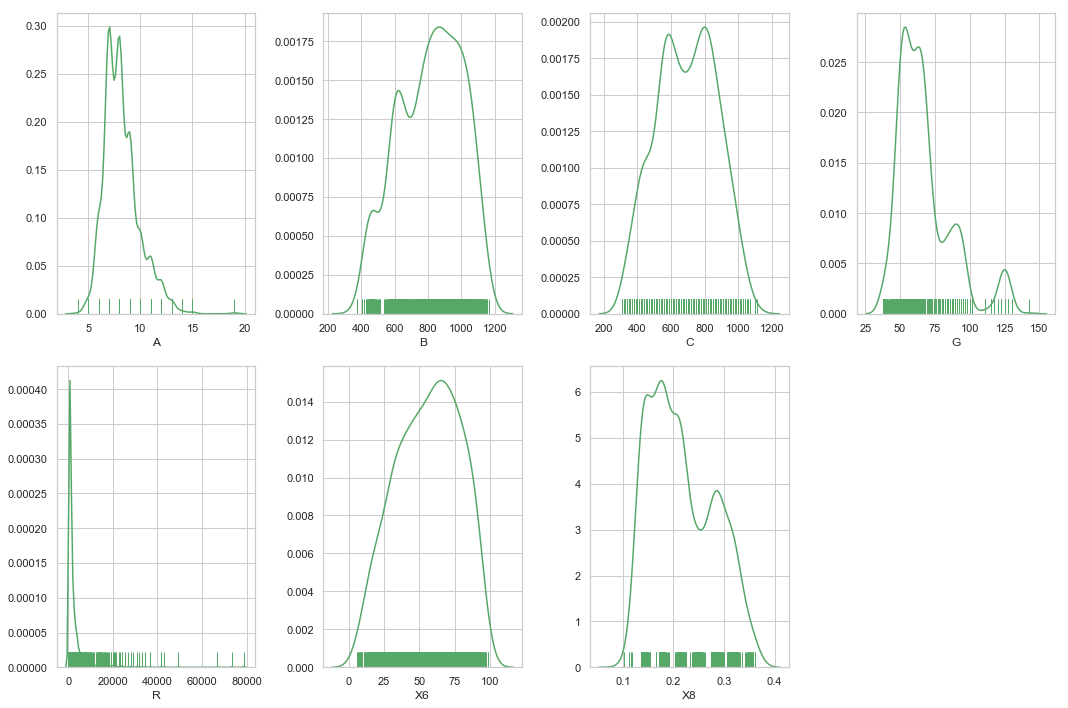

In [157]:
''' All features are non-normal i.e Non parametric in nature '''

sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
for i,col in enumerate(B.columns):
    plt.subplot(2, 4,i + 1)
    sns.distplot(B[col], color = 'g',rug = True, hist = False)
    plt.tight_layout()
plt.show()

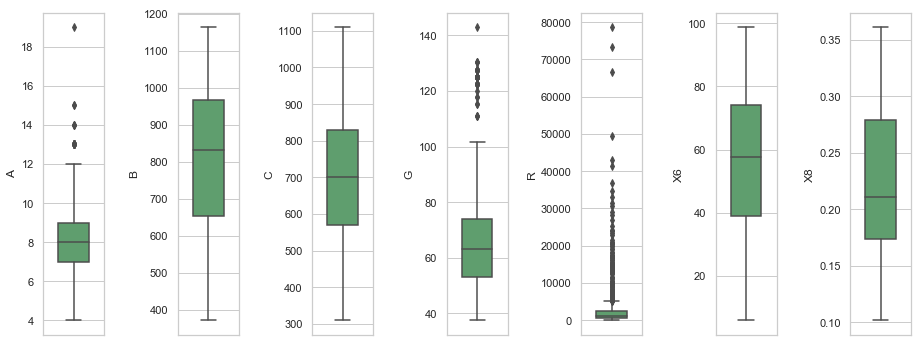

In [158]:
''' A, G, R having outliers '''

sns.set_style('whitegrid')

plt.figure(figsize = (13,5))
for i,col in enumerate(B.columns):
    plt.subplot(1, 7,i + 1)
    sns.boxplot(y = B[col], color = 'g', orient='v', width=0.5)
    plt.tight_layout()
plt.show()


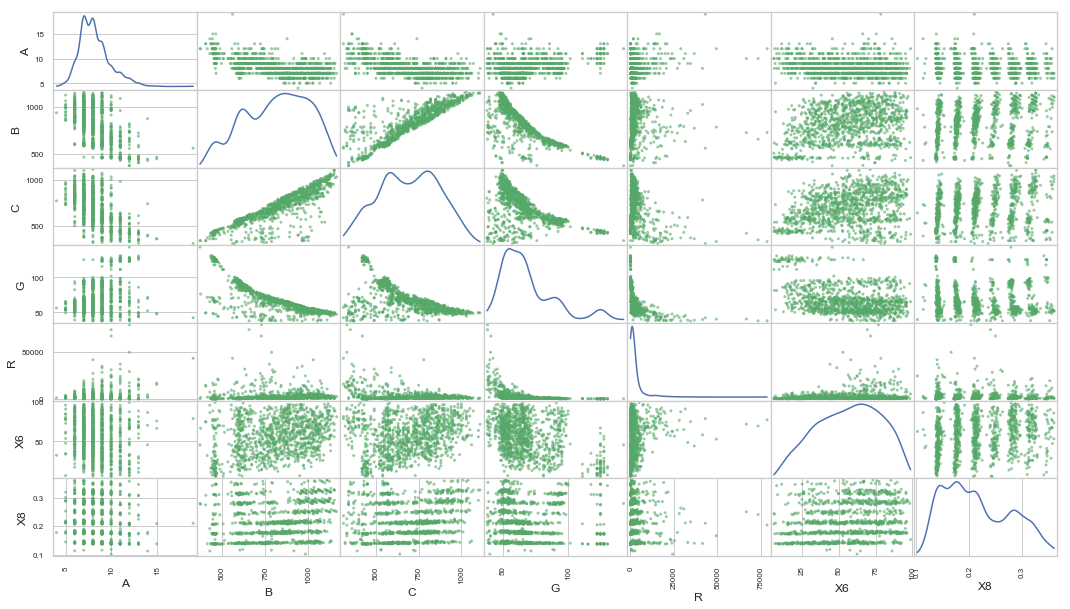

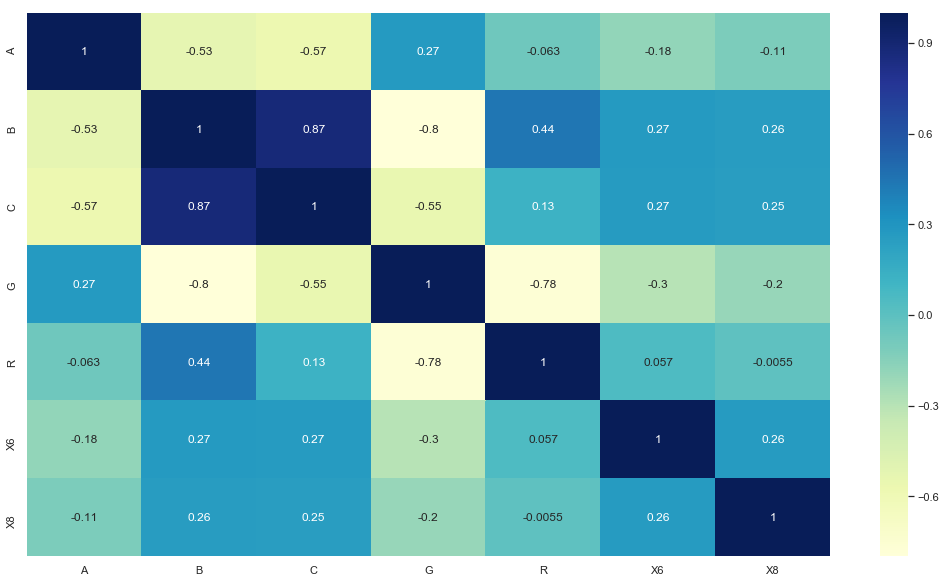

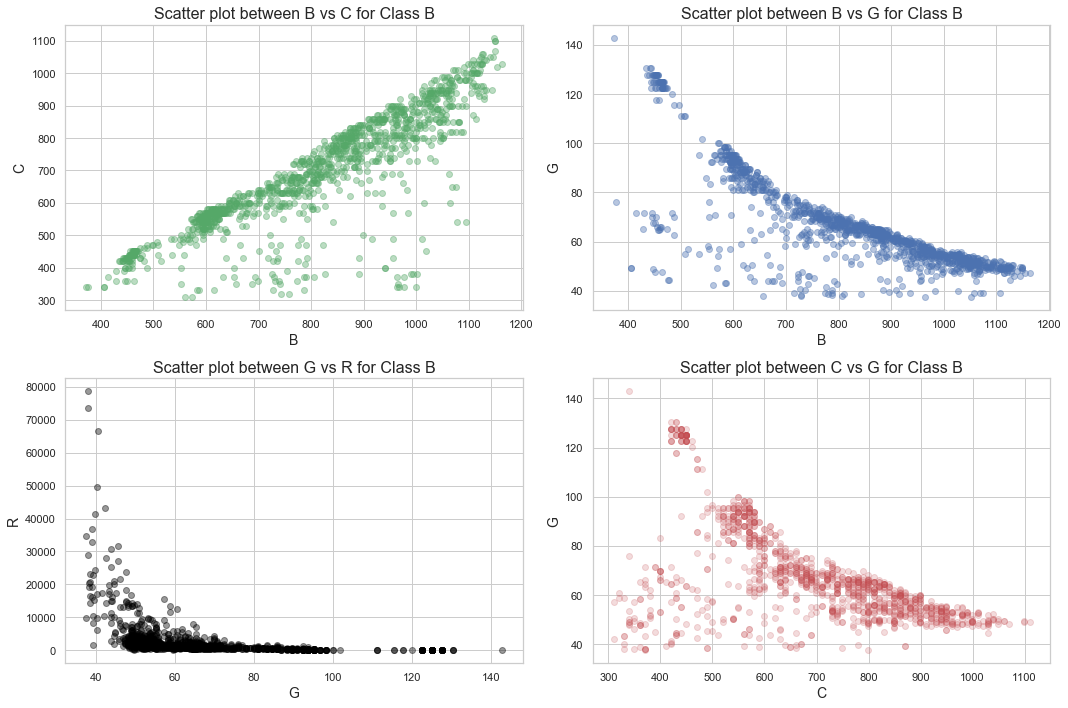

In [160]:
#'''Handling Outliers'''
#des = B.describe() 
#type(des)
#iqr = des.iloc[[4,6],:]

#iqr_range = iqr.iloc[1,:] - iqr.iloc[0,:]
#limit = 1.5*iqr_range
#upper = iqr.iloc[1,:] + limit
#lower = iqr.iloc[0,:] - limit

#l = [0,3,4] 
#''' list of A, G, R columns index '''

#for index, columns in enumerate(l):    
#    x = B.iloc[:, columns]
#    ix = np.where((x > upper[index]) | (x < lower[index]))
#    x.iloc[ix] = x.replace(x.iloc[ix], des.iloc[5, columns])

''' Plotting Scatter Matrix '''

scatter_matrix(B, color = 'g', alpha= 0.6, diagonal = 'kde', figsize=(18, 10))
plt.show()

''' Heatmap of Correlation Matrix '''
'\n'
cor = B.corr(method = 'spearman')
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot = True, cmap = 'YlGnBu')
plt.show()
''' B,C,G,R' showing strong correlation '''

''' scatter plot between variables showing correlation '''

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.scatter(B['B'], B['C'], c = 'g', alpha = 0.4, label = (B,C))
plt.xlabel('B', fontsize=14)
plt.ylabel('C', fontsize=14)
plt.title('Scatter plot between B vs C for Class B',fontsize=16)
plt.subplot(2,2,2)
plt.scatter(B['B'], B['G'], c = 'b', alpha = 0.4)
plt.xlabel('B', fontsize=14)
plt.ylabel('G', fontsize=14)
plt.title('Scatter plot between B vs G for Class B',fontsize=16)
plt.subplot(2,2,3)
plt.scatter(B['G'], B['R'], c = 'black', alpha = 0.4)
plt.xlabel('G', fontsize=14)
plt.ylabel('R', fontsize=14)
plt.title('Scatter plot between G vs R for Class B',fontsize=16)
plt.subplot(2,2,4)
plt.scatter(B['C'], B['G'], c = 'r', alpha = 0.2)
plt.xlabel('C', fontsize=14)
plt.ylabel('G', fontsize=14)
plt.title('Scatter plot between C vs G for Class B',fontsize=16)
plt.tight_layout()
plt.show()


# EDA insights For Class B

In [162]:
# Variables A & R have int dtype, remaining features have float dtype.
print('Skewness of B: \n {}'.format(b_skewness))
#Variables A,G,R are positively skewed while remaining varibles are negatively skewed.
print('Kurtosis of B: \n {}'.format(b_kurtosis))
print('Shape of B: \n {}'.format(B.shape))
print('Mean of Variables \n {}'.format(B.mean()))
print('Median of Variables \n {}'.format(B.median()))
print('Standard deviation of Variables \n {}'.format(B.std()))
print('Interquartile range of variables are \n {}'.format(iqr_range))
# No Missing values are present.
# Duplicate values are not present.
# All features are non normally distributed.
# Distribution of All features are non normal.
# Dtype of variable A is int numeric but it can be represented as categorical variable.
print('The unique values in A are: \n {}'.format(B.A.unique()))
# Variable R,G have outliers
# Variable B,C,G,R showing multicollinearity.


Skewness of B: 
 A     1.056110
B    -0.265739
C    -0.062732
G     1.376288
R     6.570214
X6   -0.192615
X8    0.434888
dtype: float64
Kurtosis of B: 
 A      2.094887
B     -0.880205
C     -0.831034
G      1.724614
R     60.060837
X6    -0.889106
X8    -0.970587
dtype: float64
Shape of B: 
 (1163, 7)
Mean of Variables 
 A        8.208942
B      813.830284
C      693.646578
G       67.423637
R     2770.271711
X6      56.159403
X8       0.217026
dtype: float64
Median of Variables 
 A        8.0000
B      832.6600
C      699.7700
G       63.1800
R     1097.0000
X6      57.5426
X8       0.2107
dtype: float64
Standard deviation of Variables 
 A        1.678103
B      188.226739
C      175.846559
G       19.819169
R     5970.600322
X6      22.294839
X8       0.063019
dtype: float64
Interquartile range of variables are 
 A        2.00000
B      312.55000
C      259.91000
G       20.98000
R     1848.50000
X6      35.30595
X8       0.10535
dtype: float64
The unique values in A are: 
 [10  9 

# Exploratory Data Analysis for Class C ('C.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 534 to 5348
Data columns (total 7 columns):
A     1694 non-null int64
B     1694 non-null float64
C     1694 non-null float64
G     1694 non-null float64
R     1694 non-null int64
X6    1694 non-null float64
X8    1694 non-null float64
dtypes: float64(5), int64(2)
memory usage: 105.9 KB
info 
 None
                 A            B            C            G             R  \
count  1694.000000  1694.000000  1694.000000  1694.000000   1694.000000   
mean      7.748524   927.232509   803.964469    58.968524   3290.348878   
std       2.061212   181.975550   173.545224    12.811666   6343.879438   
min       4.000000   480.840000   309.900000    37.510000     18.000000   
25%       7.000000   794.310000   709.760000    47.260000    657.500000   
50%       8.000000   911.825000   809.730000    57.710000   1400.000000   
75%       8.000000  1103.930000   939.690000    67.440000   3648.750000   
max      27.000000  1267.760000  113

<Figure size 720x360 with 0 Axes>

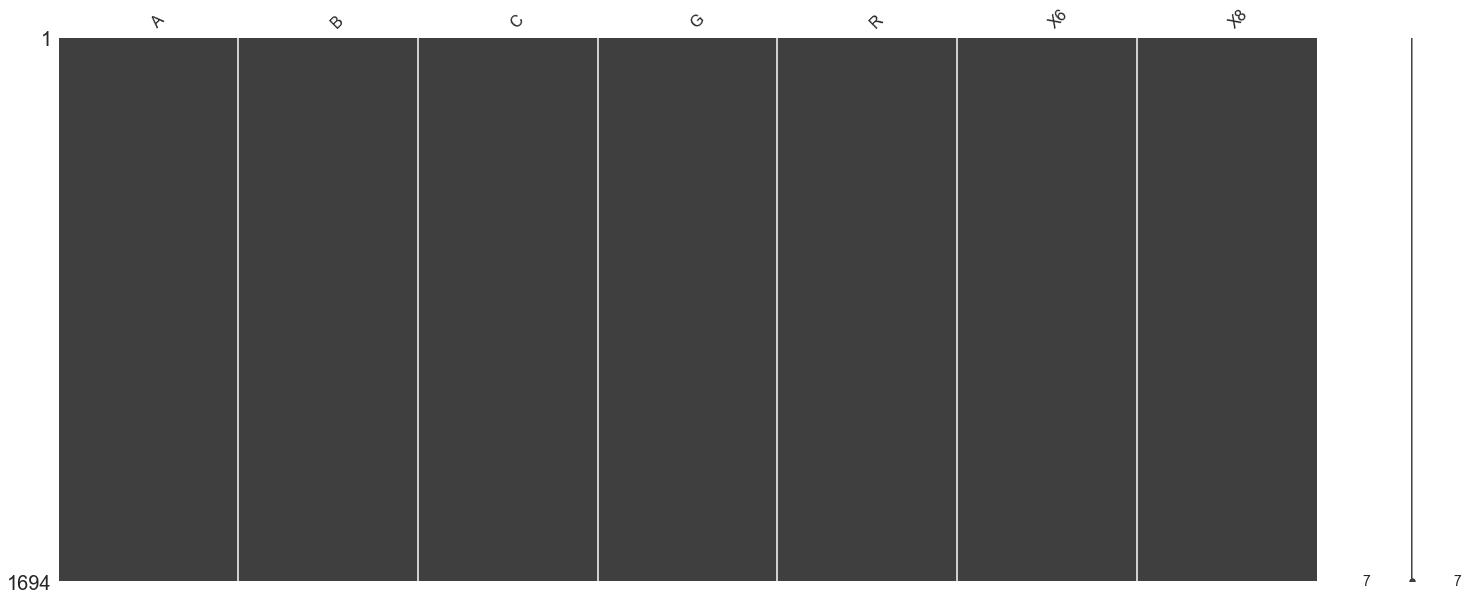

Skewness & Kurtosis distribution : 



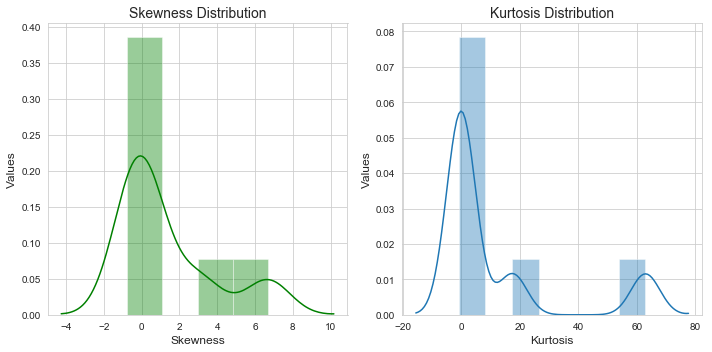

Values Counts of Variable A: 
 8     482
7     414
6     287
9     267
5      87
10     77
11     18
4      14
12      9
18      6
17      6
13      5
15      5
19      5
20      3
21      3
14      2
16      2
25      1
27      1
Name: A, dtype: int64 
 Skewness of C: 
 A     3.093855
B     0.005594
C    -0.519773
G     0.783475
R     6.666921
X6   -0.751576
X8    0.120363
dtype: float64 
 Kurtosis of C: 
 A      2.094887
B     -0.880205
C     -0.831034
G      1.724614
R     60.060837
X6    -0.889106
X8    -0.970587
dtype: float64 
 Variance in features of C 
 A     4.248595e+00
B     3.311510e+04
C     3.011794e+04
G     1.641388e+02
R     4.024481e+07
X6    3.827960e+02
X8    2.244516e-03
dtype: float64


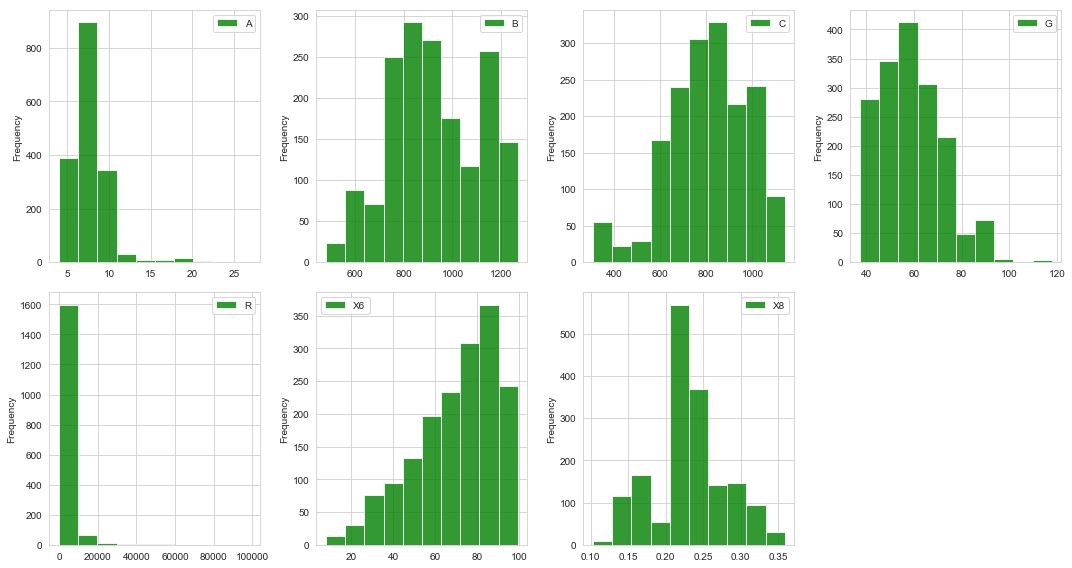

In [37]:
print('info \n',C.info())

print(C.describe())

print('\n First 5 rows of C \n \n',A.head())

print('\n \n Number of missing values: {} '.format(C.isnull().sum()))

print('\n Missing Values in each columns \n')
plt.figure(figsize = (10,5))
missingno.matrix(C.isnull())
plt.show()

val_count = C.A.value_counts()

c_skewness = C.skew()

c_kurtosis = C.kurt()

c_variance = C.var()

print('Skewness & Kurtosis distribution : \n')
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(c_skewness, color = 'g', kde = True)
plt.title('Skewness Distribution', fontsize = 14)
plt.xlabel('Skewness', fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.subplot(1,2,2)
sns.distplot(c_kurtosis)
plt.title('Kurtosis Distribution', fontsize = 14)
plt.xlabel('Kurtosis',fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()

print('Values Counts of Variable A: \n {}'.format(val_count), '\n Skewness of C: \n {}'.format(c_skewness),
'\n Kurtosis of C: \n {}'.format(b_kurtosis), '\n Variance in features of C \n {}'.format(c_variance))

''' All feaures are non-normally ditributed '''
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))
for i,col in enumerate(C.columns):
    plt.subplot(2, 4,i + 1)
    C[col].plot(kind = 'hist', legend = True, color = 'g', alpha = 0.8)
    plt.tight_layout()
plt.show()


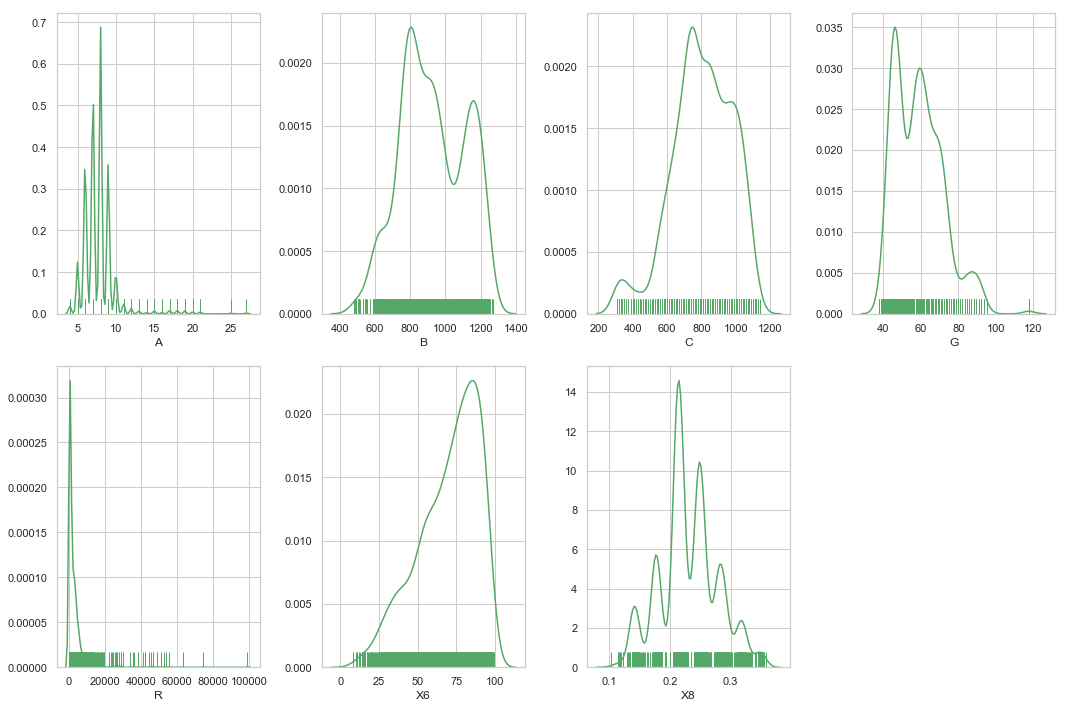

In [164]:
''' All features are non-normal i.e Non parametric in nature '''

sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
for i,col in enumerate(C.columns):
    plt.subplot(2, 4,i + 1)
    sns.distplot(C[col], color = 'g',rug = True, hist = False)
    plt.tight_layout()
plt.show()

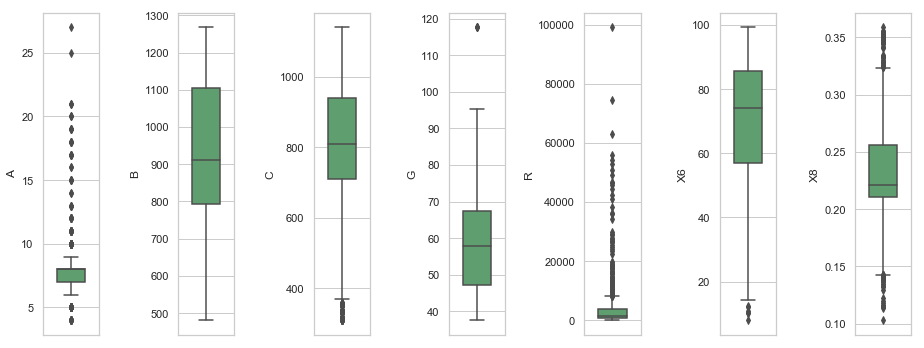

In [165]:
''' A, C, G, R, X6, X8 having outliers '''

sns.set_style('whitegrid')

plt.figure(figsize = (13,5))
for i,col in enumerate(C.columns):
    plt.subplot(1, 7,i + 1)
    sns.boxplot(y = C[col], color = 'g', orient='v', width=0.5)
    plt.tight_layout()
plt.show()


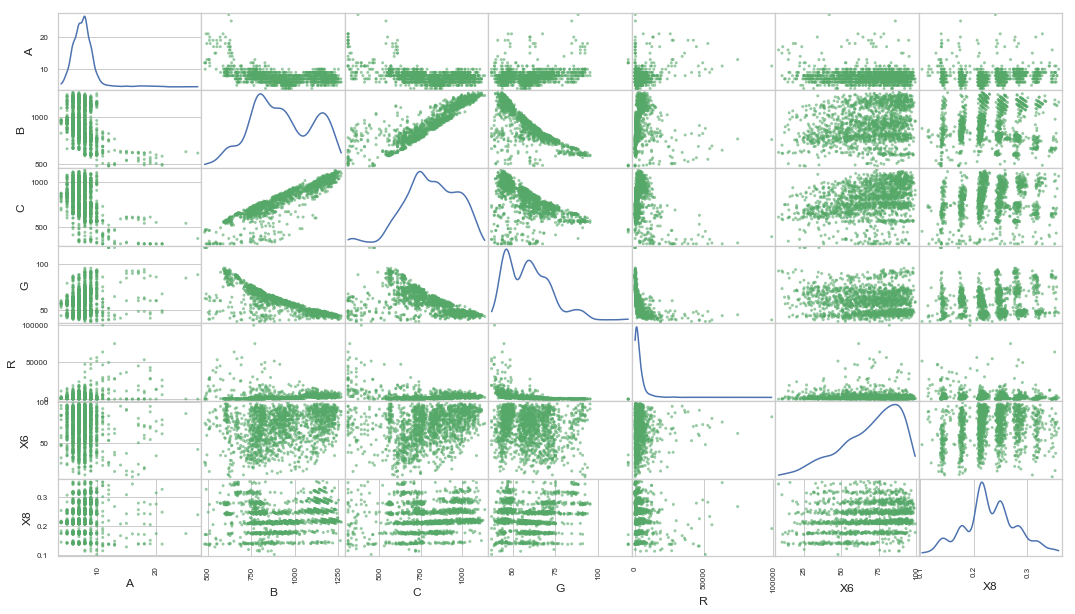

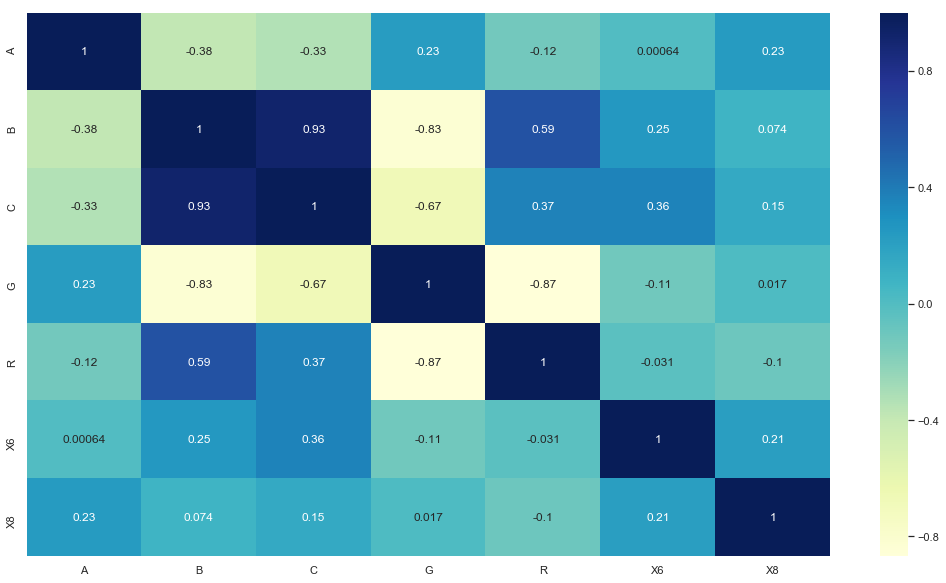

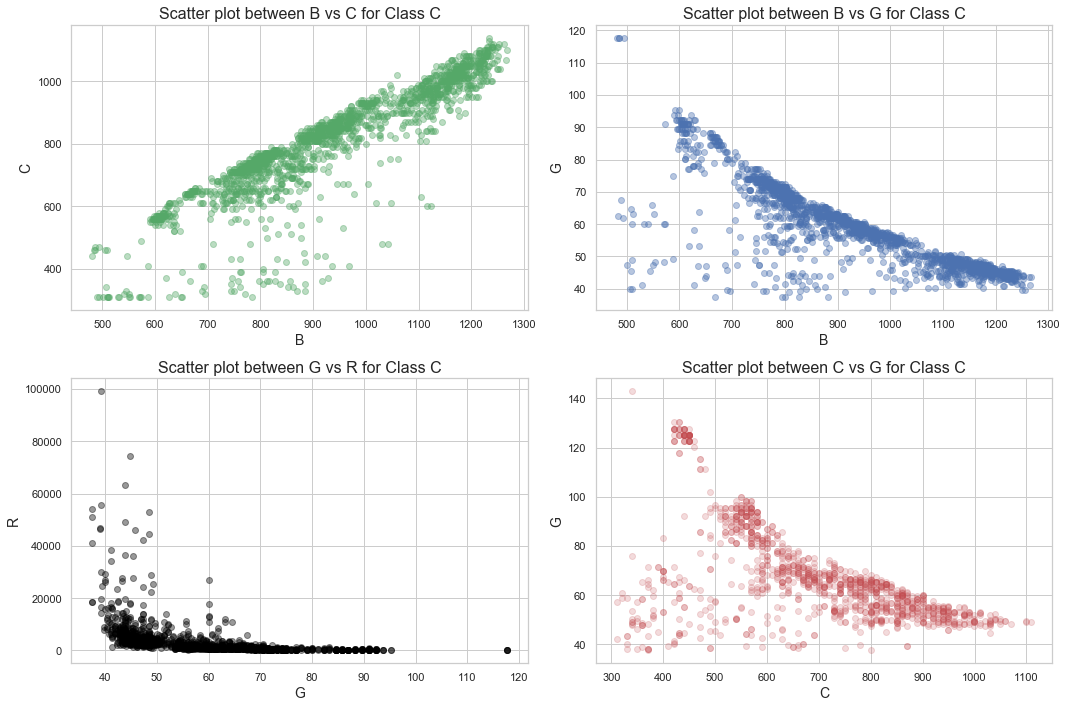

In [168]:
#'''Handling Outliers'''
#des = C.describe() 
#type(des)
#iqr = des.iloc[[4,6],:]

#iqr_range = iqr.iloc[1,:] - iqr.iloc[0,:]
#limit = 1.5*iqr_range
#upper = iqr.iloc[1,:] + limit
#lower = iqr.iloc[0,:] - limit

#l = [0,3,4] 
#''' list of A, G, R columns index '''

#for index, columns in enumerate(l):    
#    x = C.iloc[:, columns]
#    ix = np.where((x > upper[index]) | (x < lower[index]))
#    x.iloc[ix] = x.replace(x.iloc[ix], des.iloc[5, columns])

''' Plotting Scatter Matrix '''

scatter_matrix(C, color = 'g', alpha= 0.6, diagonal = 'kde', figsize=(18, 10))
plt.show()

''' Heatmap of Correlation Matrix '''
'\n'
cor = C.corr(method = 'spearman')
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot = True, cmap = 'YlGnBu')
plt.show()
''' B,C,G,R' showing strong correlation '''

''' scatter plot between variables showing correlation '''

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.scatter(C['B'], C['C'], c = 'g', alpha = 0.4)
plt.xlabel('B', fontsize=14)
plt.ylabel('C', fontsize=14)
plt.title('Scatter plot between B vs C for Class C',fontsize=16)
plt.subplot(2,2,2)
plt.scatter(C['B'], C['G'], c = 'b', alpha = 0.4)
plt.xlabel('B', fontsize=14)
plt.ylabel('G', fontsize=14)
plt.title('Scatter plot between B vs G for Class C',fontsize=16)
plt.subplot(2,2,3)
plt.scatter(C['G'], C['R'], c = 'black', alpha = 0.4)
plt.xlabel('G', fontsize=14)
plt.ylabel('R', fontsize=14)
plt.title('Scatter plot between G vs R for Class C',fontsize=16)
plt.subplot(2,2,4)
plt.scatter(B['C'], B['G'], c = 'r', alpha = 0.2)
plt.xlabel('C', fontsize=14)
plt.ylabel('G', fontsize=14)
plt.title('Scatter plot between C vs G for Class C',fontsize=16)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis for Class D ('D.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1481 to 4863
Data columns (total 7 columns):
A     202 non-null int64
B     202 non-null float64
C     202 non-null float64
G     202 non-null float64
R     202 non-null int64
X6    202 non-null float64
X8    202 non-null float64
dtypes: float64(5), int64(2)
memory usage: 12.6 KB
info 
 None
                A            B            C           G             R  \
count  202.000000   202.000000   202.000000  202.000000    202.000000   
mean    16.143564   805.085693   680.367624   68.814851   2641.188119   
std      8.398897   202.255136   184.837640   18.718445   4422.918804   
min      5.000000   599.380000   359.880000   38.970000     26.000000   
25%      8.000000   635.342500   589.800000   51.300000    129.250000   
50%     16.500000   686.435000   619.790000   64.545000    687.000000   
75%     25.000000   951.835000   787.240000   88.260000   3571.750000   
max     28.000000  1259.580000  1119.630000   95.270000  316

<Figure size 720x360 with 0 Axes>

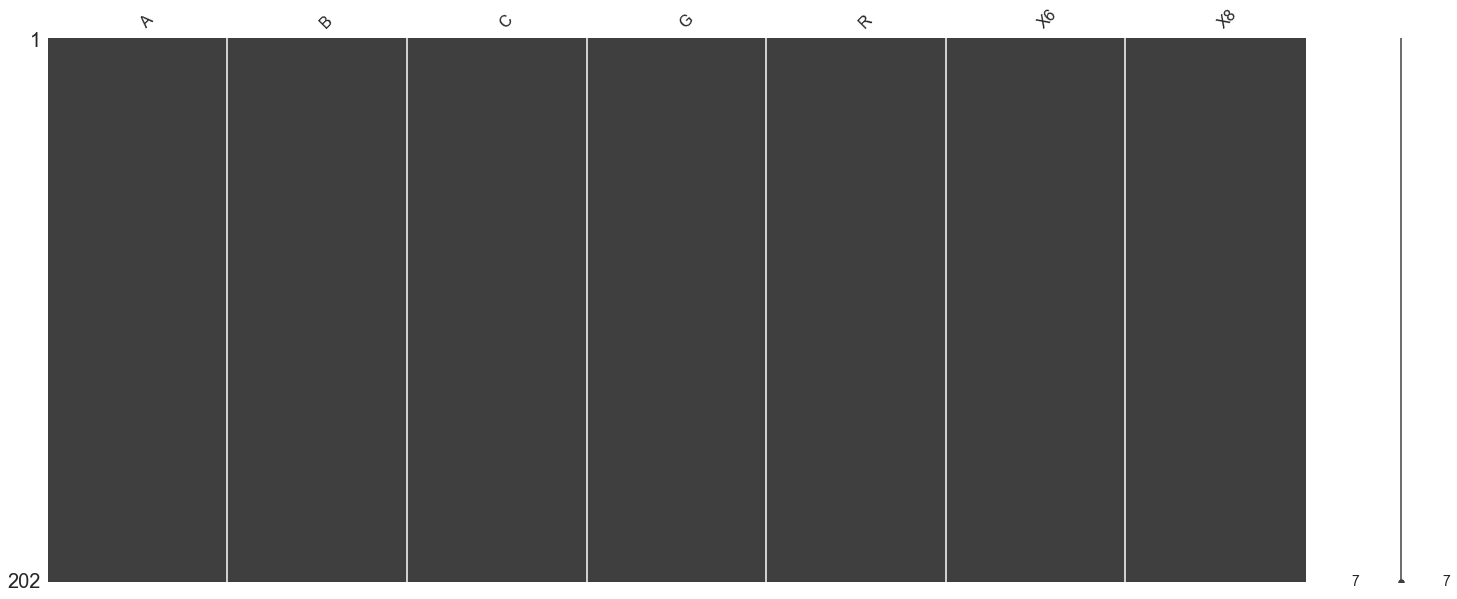

Skewness & Kurtosis distribution : 



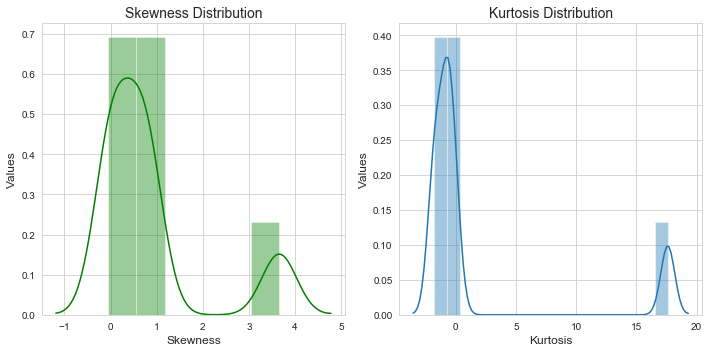

Values Counts of Variable A in Class D: 
 9     27
8     25
26    23
7     22
25    13
27    13
24    12
23    12
6     12
21     8
10     7
28     6
22     4
11     4
18     3
19     3
5      3
17     2
20     2
16     1
Name: A, dtype: int64 
 Skewness of D: 
 A     2.055279
B    -0.177990
C    -0.146795
G     1.260483
R     4.944606
X6   -0.407180
X8   -0.066154
dtype: float64 
 Kurtosis of D: 
 A      5.496018
B     -1.023409
C     -0.642811
G      1.411843
R     30.195232
X6    -0.852231
X8    -0.889990
dtype: float64 
 Variance in features of D 
 A     7.054148e+01
B     4.090714e+04
C     3.416495e+04
G     3.503802e+02
R     1.956221e+07
X6    4.753924e+02
X8    4.226433e-03
dtype: float64


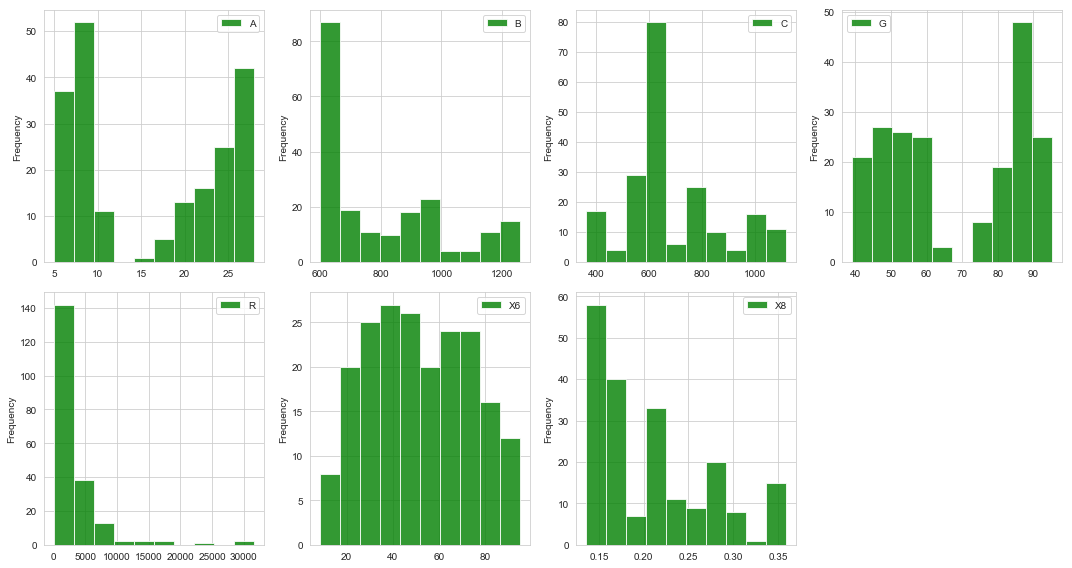

In [38]:
print('info \n',D.info())

print(D.describe())

print('\n First 5 rows of D \n \n',D.head())

print('\n \n Number of missing values: {} '.format(D.isnull().sum()))

print('\n Missing Values in each columns \n')
plt.figure(figsize = (10,5))
missingno.matrix(D.isnull())
plt.show()

val_count = D.A.value_counts()

d_skewness = D.skew()

d_kurtosis = D.kurt()

variance = D.var()

print('Skewness & Kurtosis distribution : \n')
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(d_skewness, color = 'g', kde = True)
plt.title('Skewness Distribution', fontsize = 14)
plt.xlabel('Skewness', fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.subplot(1,2,2)
sns.distplot(d_kurtosis)
plt.title('Kurtosis Distribution', fontsize = 14)
plt.xlabel('Kurtosis',fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()


print('Values Counts of Variable A in Class D: \n {}'.format(val_count), '\n Skewness of D: \n {}'.format(a_skewness),
'\n Kurtosis of D: \n {}'.format(a_kurtosis), '\n Variance in features of D \n {}'.format(variance))

''' All feaures are non-normally ditributed '''
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))
for i,col in enumerate(D.columns):
    plt.subplot(2, 4,i + 1)
    D[col].plot(kind = 'hist', legend = True, color = 'g', alpha = 0.8)
    plt.tight_layout()
plt.show()

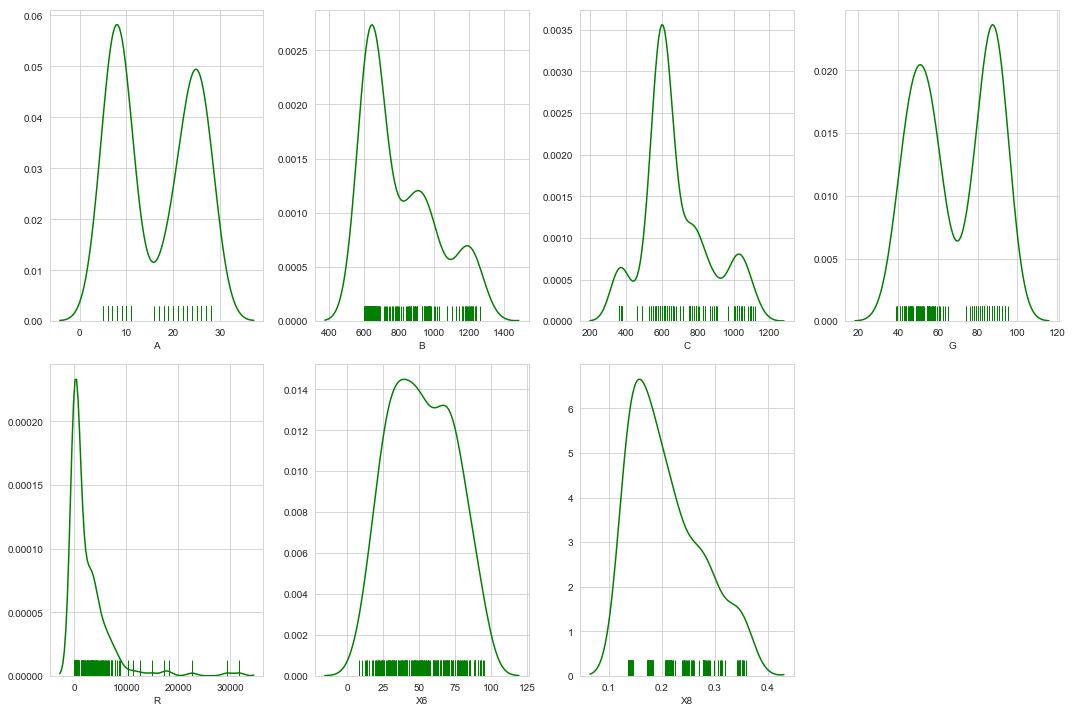

In [39]:
''' All features are non-normal i.e Non parametric in nature '''

sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
for i,col in enumerate(D.columns):
    plt.subplot(2, 4,i + 1)
    sns.distplot(D[col], color = 'g',rug = True, hist = False)
    plt.tight_layout()
plt.show()

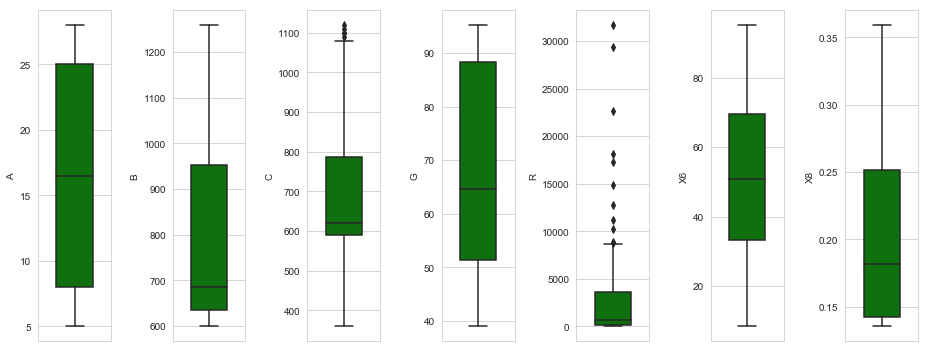

In [40]:
''' C, R having outliers '''

sns.set_style('whitegrid')

plt.figure(figsize = (13,5))
for i,col in enumerate(D.columns):
    plt.subplot(1, 7,i + 1)
    sns.boxplot(y = D[col], color = 'g', orient='v', width=0.5)
    plt.tight_layout()
plt.show()

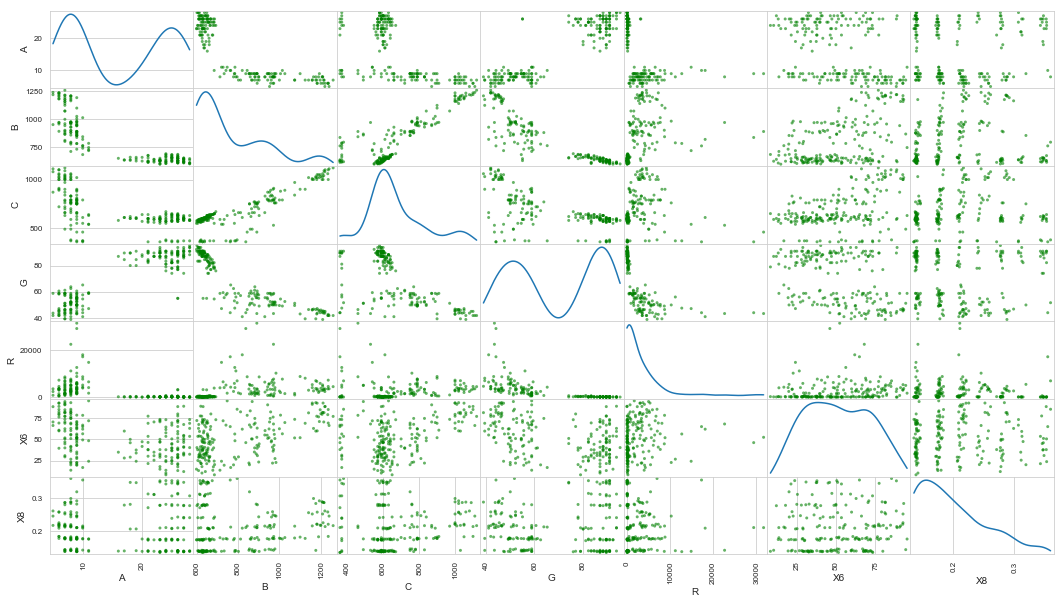

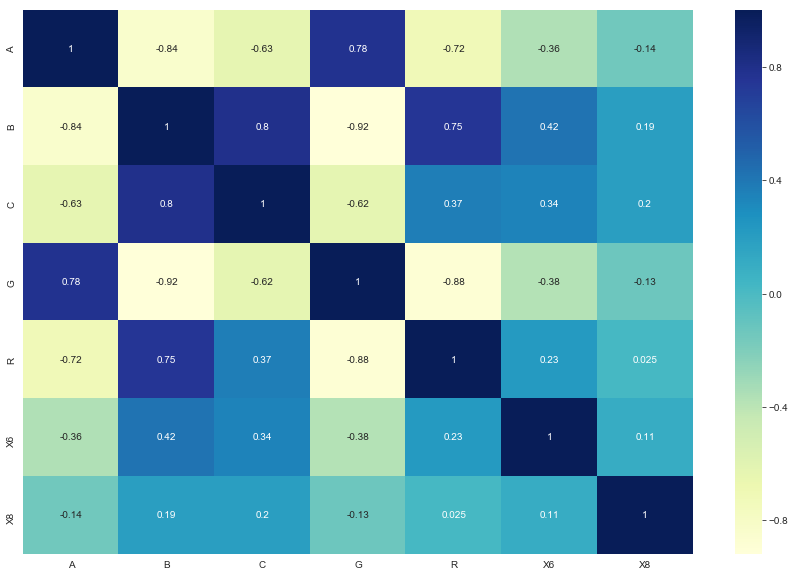

" A, B,C,G,R' showing strong correlation "

In [45]:
#'''Handling Outliers'''
#des = D.describe() 
#type(des)
#iqr = des.iloc[[4,6],:]

#iqr_range = iqr.iloc[1,:] - iqr.iloc[0,:]
#limit = 1.5*iqr_range
#upper = iqr.iloc[1,:] + limit
#lower = iqr.iloc[0,:] - limit

#l = [0,3,4] 
#''' list of A, G, R columns index '''

#for index, columns in enumerate(l):    
#    x = D.iloc[:, columns]
#    ix = np.where((x > upper[index]) | (x < lower[index]))
#    x.iloc[ix] = x.replace(x.iloc[ix], des.iloc[5, columns])

''' Plotting Scatter Matrix '''

scatter_matrix(D, color = 'g', alpha= 0.6, diagonal = 'kde', figsize=(18, 10))
plt.show()

''' Heatmap of Correlation Matrix '''
'\n'
cor = D.corr(method = 'spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(cor, annot = True, cmap = 'YlGnBu')
plt.show()
''' A,B,C,G,R' showing strong correlation '''

# EDA insights For Class D

In [46]:
# Variables A & R have int dtype, remaining features have float dtype.
print('Skewness of D: \n {}'.format(d_skewness))
#Variables A,G,R are positively skewed while remaining varibles are negatively skewed.
print('Kurtosis of D: \n {}'.format(d_kurtosis))
print('Shape of D: \n {}'.format(D.shape))
print('Mean of Variables \n {}'.format(D.mean()))
print('Median of Variables \n {}'.format(D.median()))
print('Standard deviation of Variables \n {}'.format(D.std()))
print('Interquartile range of variables are \n {}'.format(iqr_range))
# No Missing values are present.
# Duplicate values are not present.
# All features are non normally distributed.
# Distribution of All features are non normal.
# Dtype of variable A is int numeric but it can be represented as categorical variable.
print('The unique values in A are: \n {}'.format(D.A.unique()))
# Variable C, R have outliers
# Variable A,B,C,G,R showing multicollinearity.

Skewness of D: 
 A     0.087320
B     0.831806
C     0.621557
G    -0.063710
R     3.654394
X6    0.086877
X8    0.747659
dtype: float64
Kurtosis of D: 
 A     -1.810837
B     -0.618571
C     -0.057048
G     -1.698245
R     17.611441
X6    -0.996169
X8    -0.498064
dtype: float64
Shape of D: 
 (202, 7)
Mean of Variables 
 A       16.143564
B      805.085693
C      680.367624
G       68.814851
R     2641.188119
X6      51.769753
X8       0.208135
dtype: float64
Median of Variables 
 A      16.50000
B     686.43500
C     619.79000
G      64.54500
R     687.00000
X6     50.73080
X8      0.18125
dtype: float64
Standard deviation of Variables 
 A        8.398897
B      202.255136
C      184.837640
G       18.718445
R     4422.918804
X6      21.803495
X8       0.065011
dtype: float64
Interquartile range of variables are 
 A       17.000000
B      316.492500
C      197.440000
G       36.960000
R     3442.500000
X6      36.427300
X8       0.109575
dtype: float64
The unique values in A are: 
 [

# Exploratory Data Analysis for Class E ('E.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 1583 to 5006
Data columns (total 7 columns):
A     1029 non-null int64
B     1029 non-null float64
C     1029 non-null float64
G     1029 non-null float64
R     1029 non-null int64
X6    1029 non-null float64
X8    1029 non-null float64
dtypes: float64(5), int64(2)
memory usage: 64.3 KB
info 
 None
                 A            B            C            G             R  \
count  1029.000000  1029.000000  1029.000000  1029.000000   1029.000000   
mean     12.443149   848.512177   726.006589    64.434820   2776.046647   
std       6.617828   209.793019   204.820583    16.230826   5738.553575   
min       4.000000   498.820000   309.900000    38.230000      9.000000   
25%       7.000000   661.820000   589.800000    51.740000    351.000000   
50%       9.000000   796.680000   659.780000    57.710000    951.000000   
75%      18.000000  1040.760000   919.690000    81.110000   3132.000000   
max      29.000000  1304.800000  116

<Figure size 720x360 with 0 Axes>

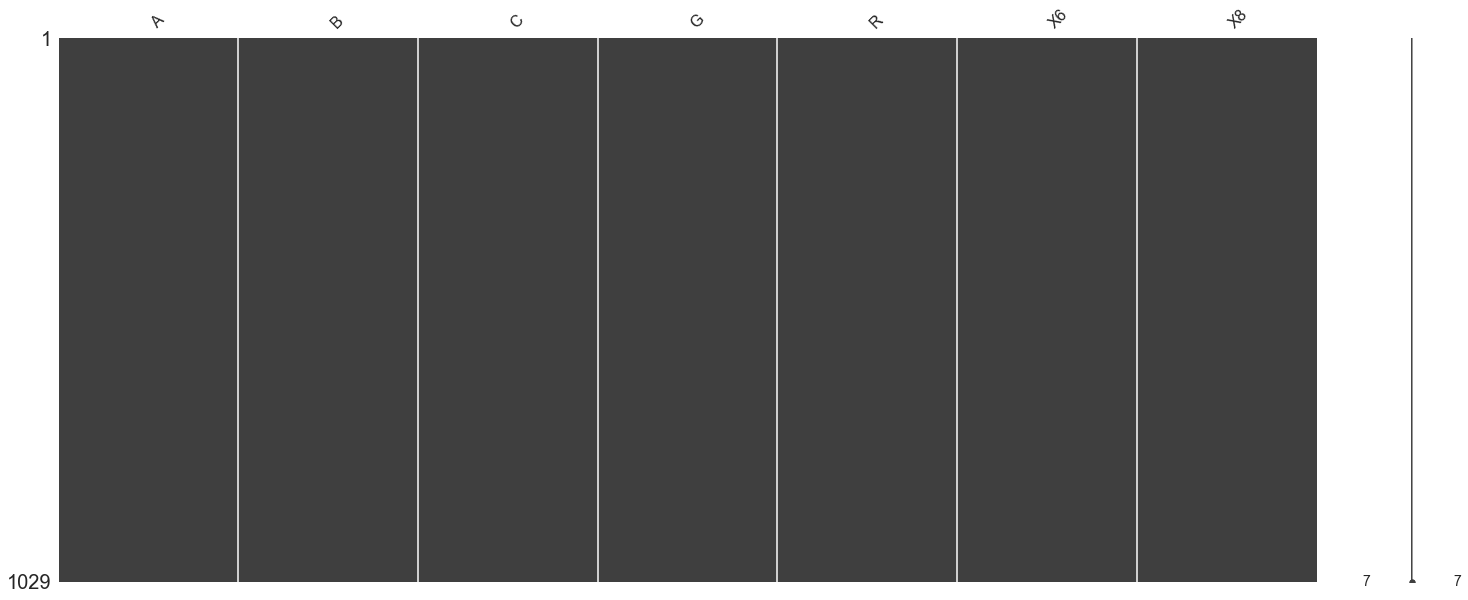

Skewness & Kurtosis distribution : 



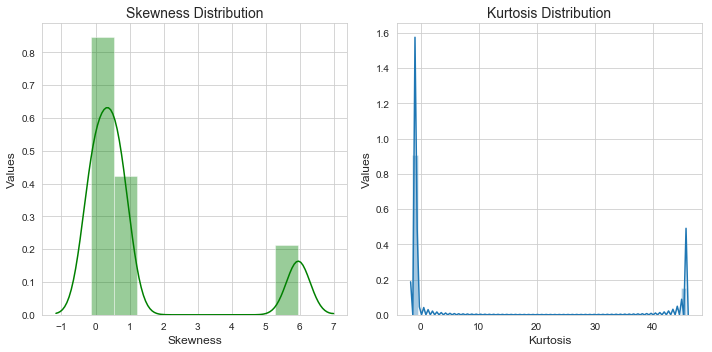

Values Counts of Variable A: 
 7     173
8     146
6     108
9      76
10     56
24     47
11     44
23     35
12     33
22     31
25     28
14     24
18     24
26     23
16     23
5      22
19     22
20     22
13     21
21     21
15     18
17     17
27     10
4       2
28      2
29      1
Name: A, dtype: int64 
 Skewness of E: 
 A     2.055279
B    -0.177990
C    -0.146795
G     1.260483
R     4.944606
X6   -0.407180
X8   -0.066154
dtype: float64 
 Kurtosis of E: 
 A      5.496018
B     -1.023409
C     -0.642811
G      1.411843
R     30.195232
X6    -0.852231
X8    -0.889990
dtype: float64 
 Variance in features of E 
 A     4.379565e+01
B     4.401311e+04
C     4.195147e+04
G     2.634397e+02
R     3.293100e+07
X6    4.959344e+02
X8    4.318034e-03
dtype: float64


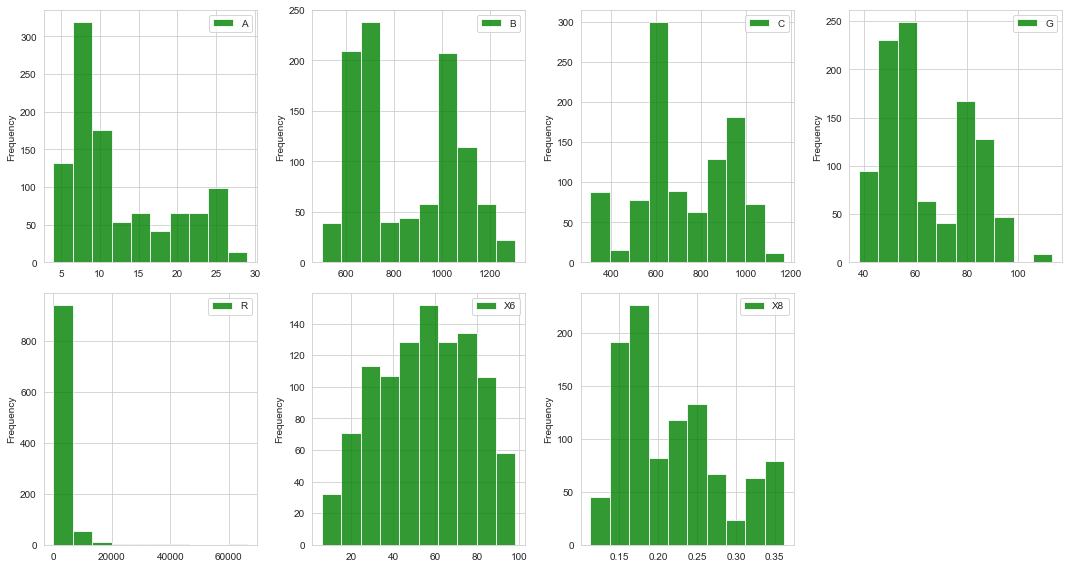

In [47]:
print('info \n',E.info())

print(E.describe())

print('\n First 5 rows of E \n \n',E.head())

print('\n \n Number of missing values: {} '.format(E.isnull().sum()))

print('\n Missing Values in each columns \n')
plt.figure(figsize = (10,5))
missingno.matrix(E.isnull())
plt.show()

val_count = E.A.value_counts()

e_skewness = E.skew()

e_kurtosis = E.kurt()

variance = E.var()

print('Skewness & Kurtosis distribution : \n')
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(e_skewness, color = 'g', kde = True)
plt.title('Skewness Distribution', fontsize = 14)
plt.xlabel('Skewness', fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.subplot(1,2,2)
sns.distplot(e_kurtosis)
plt.title('Kurtosis Distribution', fontsize = 14)
plt.xlabel('Kurtosis',fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()


print('Values Counts of Variable A: \n {}'.format(val_count), '\n Skewness of E: \n {}'.format(a_skewness),
'\n Kurtosis of E: \n {}'.format(a_kurtosis), '\n Variance in features of E \n {}'.format(variance))

''' All feaures are non-normally ditributed '''
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))
for i,col in enumerate(E.columns):
    plt.subplot(2, 4,i + 1)
    E[col].plot(kind = 'hist', legend = True, color = 'g', alpha = 0.8)
    plt.tight_layout()
plt.show()

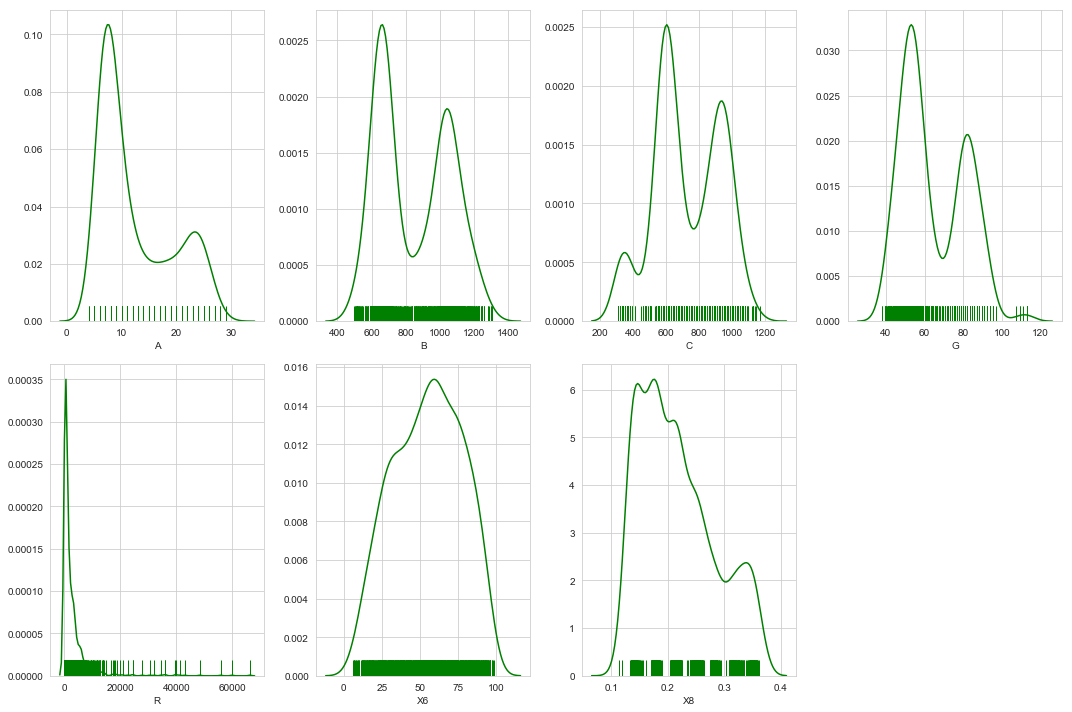

In [48]:
''' All features are non-normal i.e Non parametric in nature '''

sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
for i,col in enumerate(E.columns):
    plt.subplot(2, 4,i + 1)
    sns.distplot(E[col], color = 'g',rug = True, hist = False)
    plt.tight_layout()
plt.show()

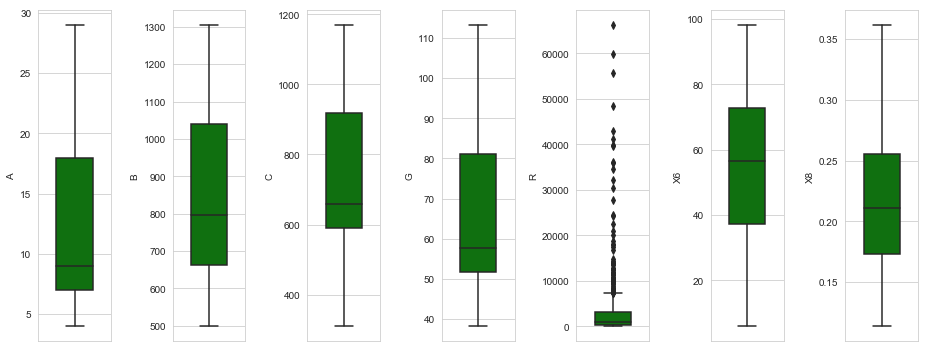

In [49]:
''' R having outliers '''

sns.set_style('whitegrid')

plt.figure(figsize = (13,5))
for i,col in enumerate(E.columns):
    plt.subplot(1, 7,i + 1)
    sns.boxplot(y = E[col], color = 'g', orient='v', width=0.5)
    plt.tight_layout()
plt.show()

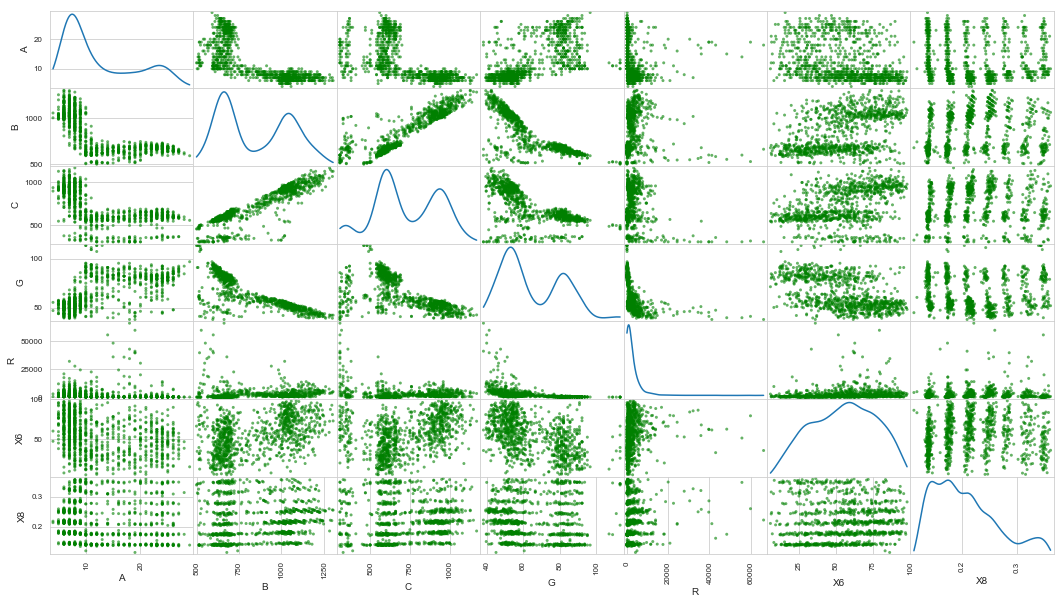

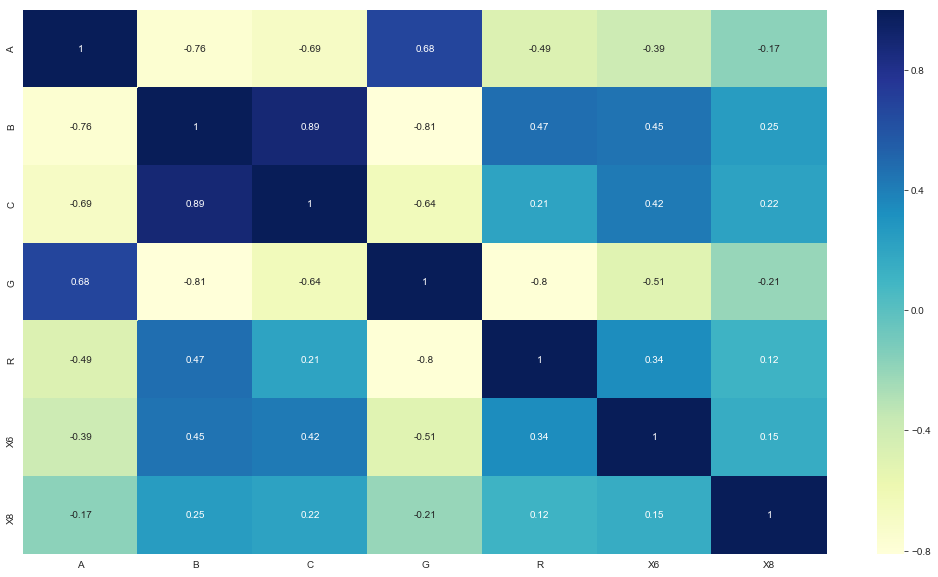

" A, B,C,G,R' showing strong correlation "

In [51]:
#'''Handling Outliers'''
#des = E.describe() 
#type(des)
#iqr = des.iloc[[4,6],:]

#iqr_range = iqr.iloc[1,:] - iqr.iloc[0,:]
#limit = 1.5*iqr_range
#upper = iqr.iloc[1,:] + limit
#lower = iqr.iloc[0,:] - limit

#l = [0,3,4] 
#''' list of A, G, R columns index '''

#for index, columns in enumerate(l):    
#    x = E.iloc[:, columns]
#    ix = np.where((x > upper[index]) | (x < lower[index]))
#    x.iloc[ix] = x.replace(x.iloc[ix], des.iloc[5, columns])

''' Plotting Scatter Matrix '''

scatter_matrix(E, color = 'g', alpha= 0.6, diagonal = 'kde', figsize=(18, 10))
plt.show()

''' Heatmap of Correlation Matrix '''
'\n'
cor = E.corr(method = 'spearman')
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot = True, cmap = 'YlGnBu')
plt.show()
''' A, B,C,G,R' showing strong correlation '''

# EDA insights For Class E

In [52]:
# Variables A & R have int dtype, remaining features have float dtype.
print('Skewness of E: \n {}'.format(e_skewness))
#Variables A,G,R are positively skewed while remaining varibles are negatively skewed.
print('Kurtosis of E: \n {}'.format(e_kurtosis))
print('Shape of E: \n {}'.format(E.shape))
print('Mean of Variables \n {}'.format(E.mean()))
print('Median of Variables \n {}'.format(E.median()))
print('Standard deviation of Variables \n {}'.format(E.std()))
print('Interquartile range of variables are \n {}'.format(iqr_range))
# No Missing values are present.
# Duplicate values are not present.
# All features are non normally distributed.
# Distribution of All features are non normal.
# Dtype of variable A is int numeric but it can be represented as categorical variable.
print('The unique values in A are: \n {}'.format(E.A.unique()))
# Variable R have outliers
# Variable A,B,C,G,R showing multicollinearity.


Skewness of E: 
 A     0.835759
B     0.224328
C    -0.086607
G     0.483348
R     5.957132
X6   -0.125088
X8    0.602611
dtype: float64
Kurtosis of E: 
 A     -0.768651
B     -1.413716
C     -0.927812
G     -0.933203
R     45.818728
X6    -0.923994
X8    -0.695672
dtype: float64
Shape of E: 
 (1029, 7)
Mean of Variables 
 A       12.443149
B      848.512177
C      726.006589
G       64.434820
R     2776.046647
X6      55.052573
X8       0.216995
dtype: float64
Median of Variables 
 A       9.0000
B     796.6800
C     659.7800
G      57.7100
R     951.0000
X6     56.6372
X8      0.2108
dtype: float64
Standard deviation of Variables 
 A        6.617828
B      209.793019
C      204.820583
G       16.230826
R     5738.553575
X6      22.269585
X8       0.065712
dtype: float64
Interquartile range of variables are 
 A       11.0000
B      378.9400
C      329.8900
G       29.3700
R     2781.0000
X6      35.6370
X8       0.0827
dtype: float64
The unique values in A are: 
 [25 27 26 23 22 24 21

# Exploratory Data Analysis for Class F ('F.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 2048 to 4359
Data columns (total 7 columns):
A     699 non-null int64
B     699 non-null float64
C     699 non-null float64
G     699 non-null float64
R     699 non-null int64
X6    699 non-null float64
X8    699 non-null float64
dtypes: float64(5), int64(2)
memory usage: 43.7 KB
info 
 None
                A            B            C           G             R  \
count  699.000000   699.000000   699.000000  699.000000    699.000000   
mean     9.726753   935.594592   784.030300   57.370200   3927.686695   
std      4.363631   183.032058   182.913254   13.420606   3934.845772   
min      5.000000   508.250000   319.890000   38.230000      4.000000   
25%      7.000000   841.925000   679.770000   47.825000   2170.000000   
50%      8.000000   906.150000   769.740000   56.090000   3424.000000   
75%     10.000000  1127.380000   959.680000   60.630000   4808.000000   
max     28.000000  1271.000000  1139.620000  115.420000  710

<Figure size 720x360 with 0 Axes>

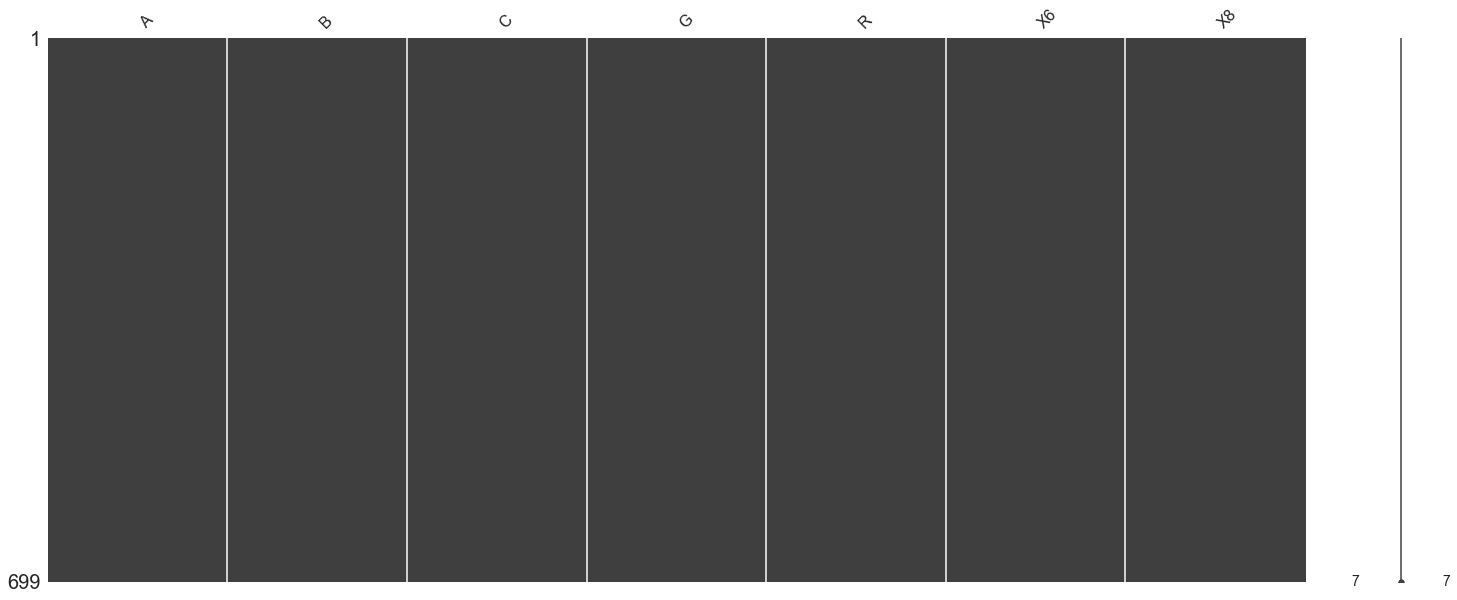

Skewness & Kurtosis distribution : 



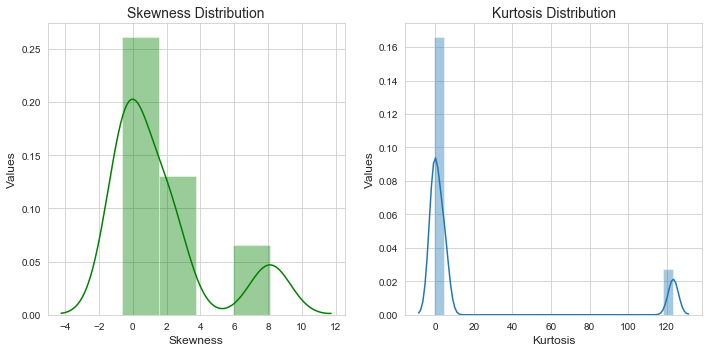

Values Counts of Variable A: 
 8     215
7     135
9      92
6      51
10     37
12     25
11     23
18     17
13     14
5      13
20     12
19     12
16      9
15      8
27      8
17      8
14      4
21      3
22      3
28      3
23      2
24      2
26      2
25      1
Name: A, dtype: int64 
 Skewness of F: 
 A     2.055279
B    -0.177990
C    -0.146795
G     1.260483
R     4.944606
X6   -0.407180
X8   -0.066154
dtype: float64 
 Kurtosis of F: 
 A      5.496018
B     -1.023409
C     -0.642811
G      1.411843
R     30.195232
X6    -0.852231
X8    -0.889990
dtype: float64 
 Variance in features of F 
 A     1.904127e+01
B     3.350073e+04
C     3.345726e+04
G     1.801127e+02
R     1.548301e+07
X6    4.700050e+02
X8    2.877123e-03
dtype: float64


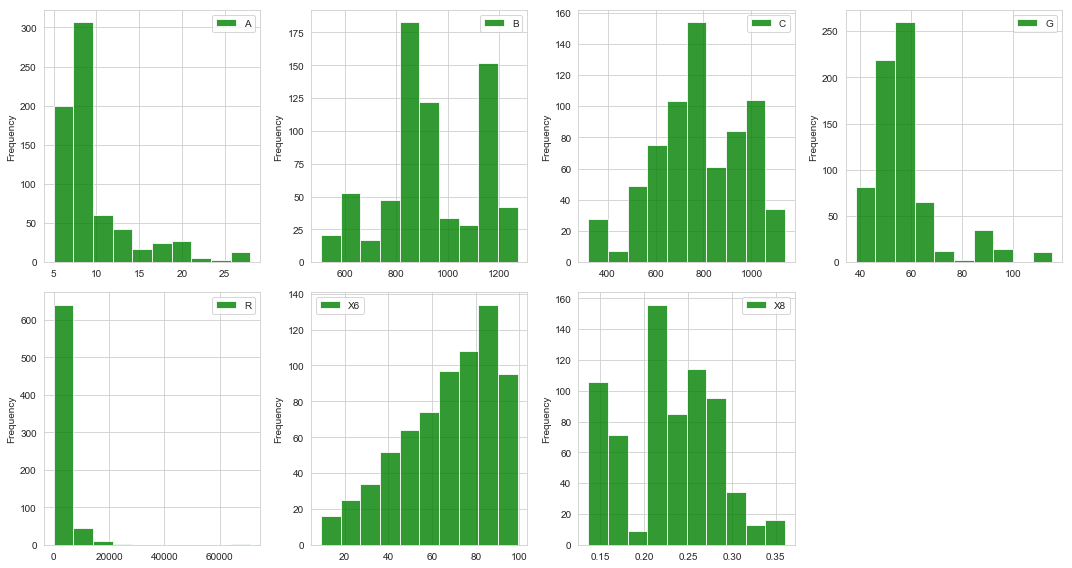

In [53]:
print('info \n',F.info())

print(F.describe())

print('\n First 5 rows of F \n \n',A.head())

print('\n \n Number of missing values: {} '.format(F.isnull().sum()))

print('\n Missing Values in each columns \n')
plt.figure(figsize = (10,5))
missingno.matrix(F.isnull())
plt.show()

val_count = F.A.value_counts()

f_skewness = F.skew()

f_kurtosis = F.kurt()

variance = F.var()

print('Skewness & Kurtosis distribution : \n')
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(f_skewness, color = 'g', kde = True)
plt.title('Skewness Distribution', fontsize = 14)
plt.xlabel('Skewness', fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.subplot(1,2,2)
sns.distplot(f_kurtosis)
plt.title('Kurtosis Distribution', fontsize = 14)
plt.xlabel('Kurtosis',fontsize = 12)
plt.ylabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()


print('Values Counts of Variable A: \n {}'.format(val_count), '\n Skewness of F: \n {}'.format(a_skewness),
'\n Kurtosis of F: \n {}'.format(a_kurtosis), '\n Variance in features of F \n {}'.format(variance))

''' All feaures are non-normally ditributed '''
sns.set_style('whitegrid')

plt.figure(figsize = (15,8))
for i,col in enumerate(F.columns):
    plt.subplot(2, 4,i + 1)
    F[col].plot(kind = 'hist', legend = True, color = 'g', alpha = 0.8)
    plt.tight_layout()
plt.show()

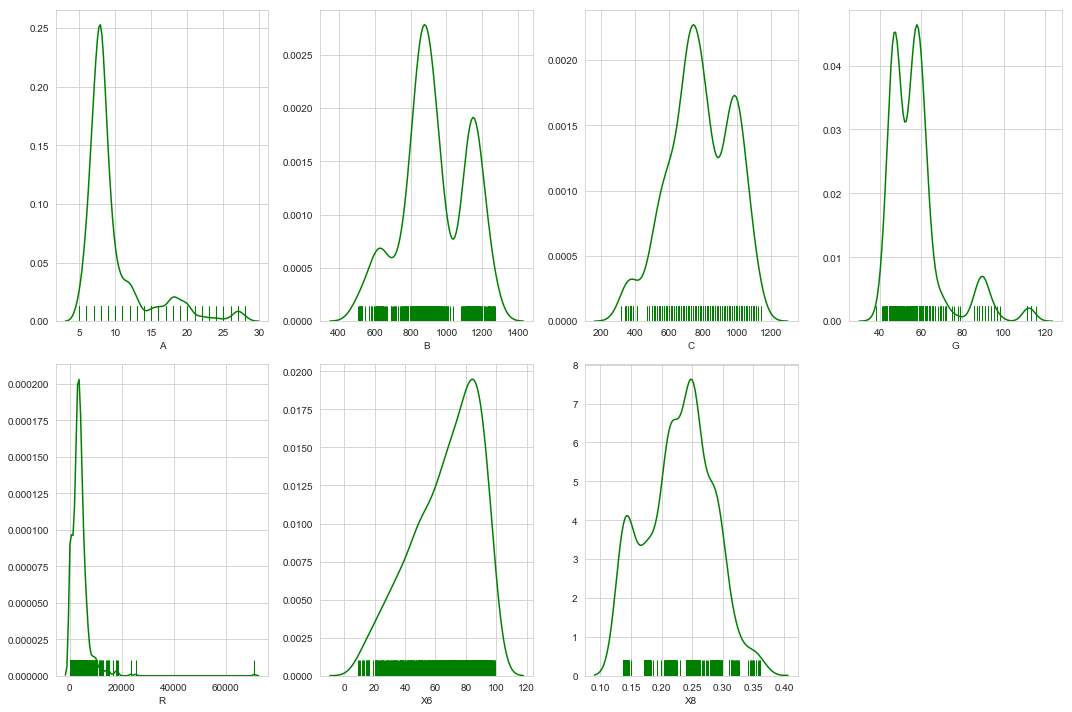

In [54]:
''' All features are non-normal i.e Non parametric in nature '''

sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
for i,col in enumerate(F.columns):
    plt.subplot(2, 4,i + 1)
    sns.distplot(F[col], color = 'g',rug = True, hist = False)
    plt.tight_layout()
plt.show()

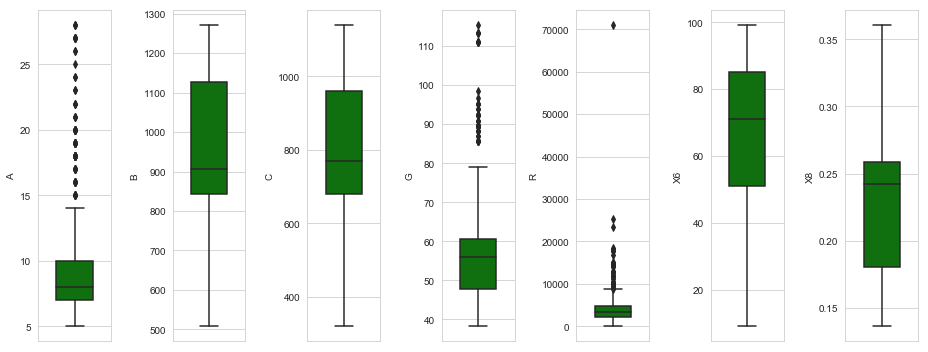

In [55]:
''' A, G, R having outliers '''

sns.set_style('whitegrid')

plt.figure(figsize = (13,5))
for i,col in enumerate(F.columns):
    plt.subplot(1, 7,i + 1)
    sns.boxplot(y = F[col], color = 'g', orient='v', width=0.5)
    plt.tight_layout()
plt.show()

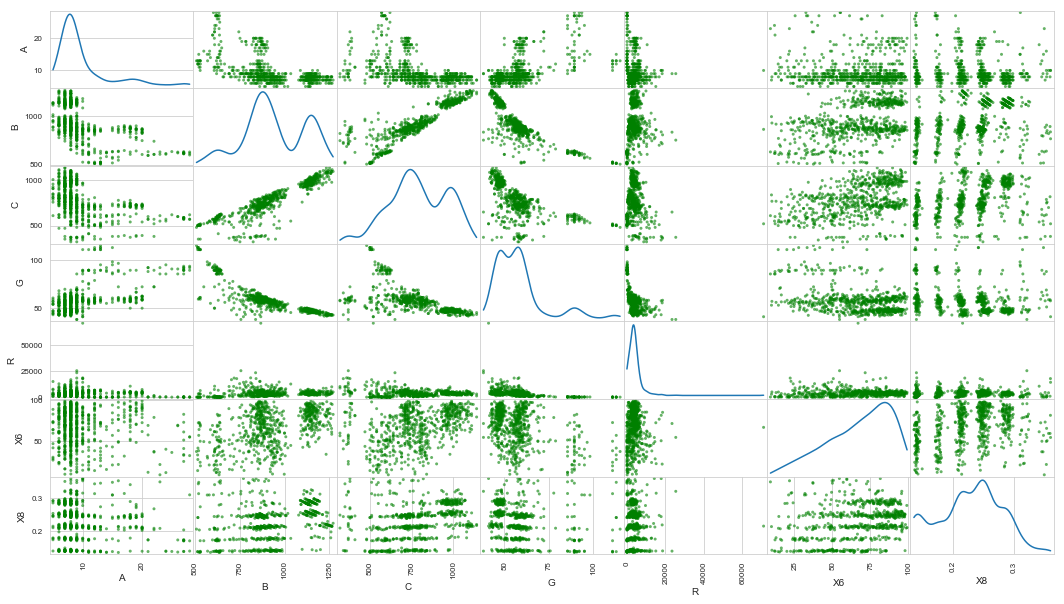

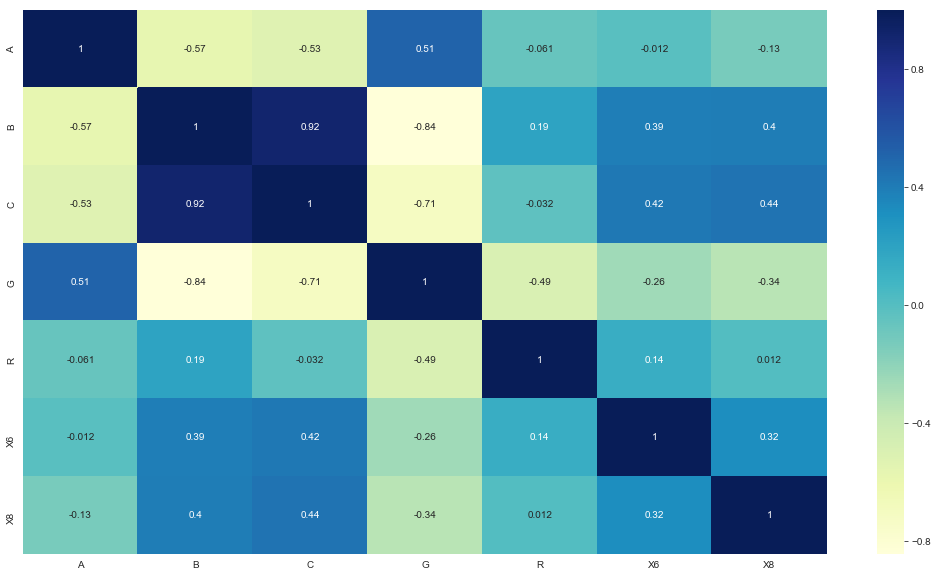

' B,C,G showing strong correlation '

In [57]:
#'''Handling Outliers'''
#des = F.describe() 
#type(des)
#iqr = des.iloc[[4,6],:]

#iqr_range = iqr.iloc[1,:] - iqr.iloc[0,:]
#limit = 1.5*iqr_range
#upper = iqr.iloc[1,:] + limit
#lower = iqr.iloc[0,:] - limit

#l = [0,3,4] 
#''' list of A, G, R columns index '''

#for index, columns in enumerate(l):    
#    x = F.iloc[:, columns]
#    ix = np.where((x > upper[index]) | (x < lower[index]))
#    x.iloc[ix] = x.replace(x.iloc[ix], des.iloc[5, columns])

''' Plotting Scatter Matrix '''

scatter_matrix(F, color = 'g', alpha= 0.6, diagonal = 'kde', figsize=(18, 10))
plt.show()

''' Heatmap of Correlation Matrix '''

cor = F.corr(method = 'spearman')
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot = True, cmap = 'YlGnBu')
plt.show()
''' B,C,G showing strong correlation '''

# EDA insights For Class F

In [58]:
# Variables A & R have int dtype, remaining features have float dtype.
print('Skewness of F: \n {}'.format(f_skewness))
#Variables A,G,R are positively skewed while remaining varibles are negatively skewed.
print('Kurtosis of F: \n {}'.format(f_kurtosis))
print('Shape of F: \n {}'.format(F.shape))
print('Mean of Variables \n {}'.format(F.mean()))
print('Median of Variables \n {}'.format(F.median()))
print('Standard deviation of Variables \n {}'.format(F.std()))
print('Interquartile range of variables are \n {}'.format(iqr_range))
# No Missing values are present.
# Duplicate values are not present.
# All features are non normally distributed.
# Distribution of All features are non normal.
# Dtype of variable A is int numeric but it can be represented as categorical variable.
print('The unique values in A are: \n {}'.format(F.A.unique()))
# Variable A,G,R have outliers
# Variable B,C,G showing multicollinearity.

Skewness of F: 
 A     2.143970
B    -0.165794
C    -0.253721
G     1.964089
R     8.121847
X6   -0.635679
X8   -0.053537
dtype: float64
Kurtosis of F: 
 A       4.467501
B      -0.649533
C      -0.533365
G       4.341461
R     123.372903
X6     -0.487639
X8     -0.628668
dtype: float64
Shape of F: 
 (699, 7)
Mean of Variables 
 A        9.726753
B      935.594592
C      784.030300
G       57.370200
R     3927.686695
X6      66.951735
X8       0.228322
dtype: float64
Median of Variables 
 A        8.000
B      906.150
C      769.740
G       56.090
R     3424.000
X6      71.032
X8       0.242
dtype: float64
Standard deviation of Variables 
 A        4.363631
B      183.032058
C      182.913254
G       13.420606
R     3934.845772
X6      21.679599
X8       0.053639
dtype: float64
Interquartile range of variables are 
 A        3.00000
B      285.45500
C      279.91000
G       12.80500
R     2638.00000
X6      33.97225
X8       0.07795
dtype: float64
The unique values in A are: 
 [13 11 1

* 4.4 Build a classification model by use dimensionality reduction and feature selection techniques. Explain why you used whichever model you selected for classification.

In [181]:
df = pd.read_csv('Test_Data.csv',index_col = 0)
data = df.copy()

data_num = data.drop('Class', axis = 1)

data_num.info()

d_int = df.select_dtypes(include = 'int64')

print('Unique Values of A: \n',d_int.A.unique())

print('Unique Values of J: \n',d_int.J.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5839 entries, 0 to 5838
Data columns (total 41 columns):
A     5839 non-null int64
B     5839 non-null float64
C     5839 non-null float64
D     5839 non-null float64
E     5839 non-null float64
F     5839 non-null float64
G     5839 non-null float64
H     5839 non-null float64
I     5839 non-null float64
J     5839 non-null int64
K     5839 non-null float64
L     5839 non-null float64
M     5839 non-null float64
N     5839 non-null float64
O     5839 non-null float64
P     5839 non-null float64
Q     5839 non-null float64
R     5839 non-null int64
X1    5839 non-null int64
X2    5839 non-null float64
X3    5839 non-null float64
X4    5839 non-null float64
X5    5839 non-null float64
X6    5839 non-null float64
X7    5839 non-null float64
X8    5839 non-null float64
X9    5839 non-null float64
Y1    5839 non-null float64
Y2    5839 non-null float64
Y3    5839 non-null float64
Y4    5839 non-null float64
Y5    5839 non-null float64
Y6   

In [183]:
'''Standard Scaling'''

scale = StandardScaler()

scaled_data = scale.fit_transform(data_num.values)

In [185]:
'''Implementing PCA'''
pca = PCA(n_components = 10) 
'''choose the minimum number of principal components such that 95% of the variance is retained.'''
principal_Components = pca.fit_transform(scaled_data)
print('explained_variance',pca.explained_variance_)
print('explained_variance_ration: ',pca.explained_variance_ratio_)
print('no. of features: ',pca.n_features_)
print('no. of principal components: ', pca.n_components_)


'''DataFrame of Principal Component'''
principal_df = pd.DataFrame(data = principal_Components, columns = ['principal_component 1', 'principal_component_2', 'principal_component_3', 'principal_component_4', 'principal_component_5', 'principal_component_6','principal_component_7','principal_component_8', 'principal_component_9', 'principal_component_10'])

explained_variance [10.78692718  9.23566245  4.82745216  3.18277939  1.70292957  1.54120819
  1.28763742  0.98151032  0.88778657  0.78236718]
explained_variance_ration:  [0.26962699 0.23085202 0.12066563 0.07955586 0.04256595 0.03852361
 0.03218542 0.02453356 0.02219086 0.01955583]
no. of features:  41
no. of principal components:  10


In [186]:
print('Principal df columns: ',principal_df.columns) # Continuous features only

Y = pd.get_dummies(data.Class, drop_first = True) #categircal features only
print('Y Columns index: ', Y.columns)

z = pd.get_dummies(data.Class)
print('Z Columns index: ',z .columns)

y = z.iloc[:,0] # Target class A
print('y Columns index: ', y.name)

Principal df columns:  Index(['principal_component 1', 'principal_component_2',
       'principal_component_3', 'principal_component_4',
       'principal_component_5', 'principal_component_6',
       'principal_component_7', 'principal_component_8',
       'principal_component_9', 'principal_component_10'],
      dtype='object')
Y Columns index:  Index(['B', 'C', 'D', 'E', 'F'], dtype='object')
Z Columns index:  Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
y Columns index:  A


In [212]:
'''Removing Class  from Y and concat with principal_df'''
d_cat = Y.iloc[:,[0,1,2, 3]]
X = pd.concat([principal_df, d_cat], axis = 1)

In [213]:
# 70-30% split as targeting only one category A from Class
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 1,stratify = y) 

print('Total rows in y: ', y.shape[0])
print('Value Counts of A in y: ', y.value_counts()[1])
print('Value Counts of y_train:', y_train.value_counts()[1])
print('Value Counts of y_test:', y_test.value_counts()[1])

Total rows in y:  5839
Value Counts of A in y:  1052
Value Counts of y_train: 631
Value Counts of y_test: 421


# Feature Selection using Random Forest

Accuracy with test data : 94.3%
Predicted     0    1   All
True                      
0          1842   73  1915
1            59  362   421
All        1901  435  2336


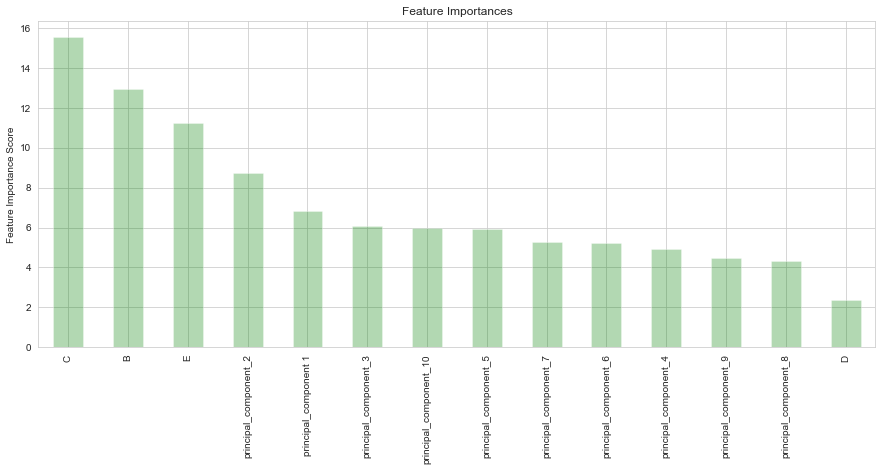

In [214]:
clf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

# Fit classifier 
clf.fit(X_train, y_train)

# Test data Prediction
y_pred = clf.predict(X_test)

# Accuracy with testdata 
print("Accuracy with test data : {0}%".format(round(accuracy_score(y_test, y_pred), 3) * 100))

# Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

feat_imp = pd.Series(clf.feature_importances_*100, X_train.columns.values).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize = (15,6), color = 'g', alpha = 0.3)
plt.ylabel('Feature Importance Score')
plt.show()

In [220]:
#Applying Logistic Regression

lr = LogisticRegression(solver = 'lbfgs')
fit_lr = lr.fit(X_train,y_train)
y_pred = fit_lr.predict(X_test)
lr
lr.coef_
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

tab = pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'], margins=True)
print(tab, '\n')
print('Classification Report: \n',classification_report(y_test,y_pred))

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

Accuracy score: 89.51 %
Predicted     0    1   All
True                      
0          1716  199  1915
1            46  375   421
All        1762  574  2336 

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1915
           1       0.65      0.89      0.75       421

   micro avg       0.90      0.90      0.90      2336
   macro avg       0.81      0.89      0.84      2336
weighted avg       0.92      0.90      0.90      2336

AUC: 0.893


* 4.5 Create a ROC curve of the model.

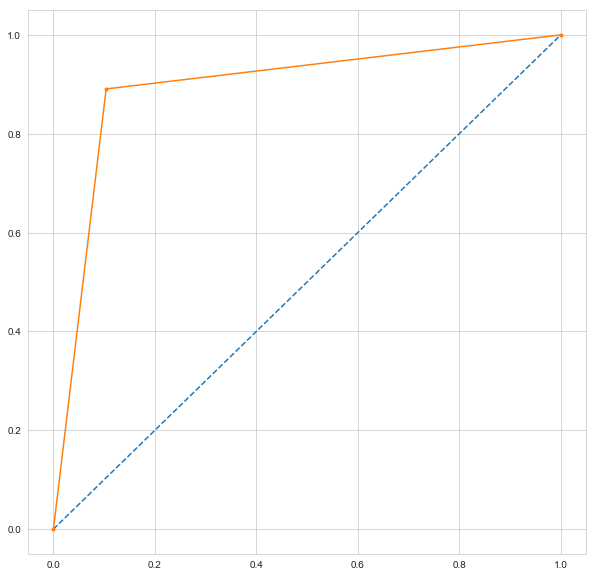

In [219]:
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure(figsize = (10,10))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()